# Capstone project: Predicting heart disease

* [INTRODUCTION](#0)
* [IMPORTING MODULES, LOADING DATA & DATA REVIEW](#1)
* [PREPROCESSING](#2)
* [EXPLORATORY DATA ANALYSIS (EDA)](#3)    
* [SCALING, CATEGORICAL VARIABLES, SPLITTING](#4)
* [MODELS](#5)
* [CONCLUSION](#6)

## 1.1 Information About the Project
Cardiovascular disease, including diseases such as coronary artery disease and stroke, are the leading cause of mortality worldwide. The global burden of heart disease has also increased in recent years, from around 12.4 million deaths in 1990 to 19.8 million deaths in 2022 reflecting both population growth as well as aging. The prevalance of cardiovascular disease varies considerably by country, with demographic factors such as age, sex and ethnicity as well as health-related and behavioural factors such as diet, cholesterol, diabetes, air pollution, obesity, tobacco use, kidney disease, physical inactivity, harmful use of alcohol, and stress. 

**Objective:**  
Being able to detect a patient's risk of heart disease from these factors could be very useful, to support earlier clinical as well as behavioural interventions. This project aims to build, finetune and deploy a binary classification predictive model that can accurately predict whether or not a patient is at high risk of a heart attack given information about that patient's demongraphic, health and behavioural characteristics.


**Scope:**  
The project will cover exploratory data analysis of this large dataset, and feature engineering to maximise the utility and efficiency of the available data for predicting heart attacks. Different types of binary classification models will be tested, compared and optimised with the best performing model to be taken through for deployment.

## 1.2 Description of the Dataset
The dataset is a large dataset including demographic, health and behavioural characteristics for over 200,000 patients from the USA, as well as information on whether or not they have suffered a heart attack.

- **Source:** The dataset is an open dataset from [Kaggle](https://www.kaggle.com/datasets/tarekmuhammed/patients-data-for-medical-field/data)
- **Size:** Total number of records: 237630, total number of columns: 35
- **Type:** Tabular

## 1.3 Description of the Columns

**Target Variable:** 
- HadHeartAttack: Indicator of whether the patient had a heart attack. This is a binary label (0 = no heart attack, 1 = had heart attack). We are trying to predict from a patients demographic, health and behavioural characteristics whether or not they will have a heart attack.

**Feature Variables:** A brief description of the important columns, including their data types.
- PatientID: Unique identifier for each patient.
- State: Geographic state of residence.
- Sex: Gender of the patient.
- GeneralHealth: Self-reported health status.
- AgeCategory: Categorized age group of the patient.
- HeightInMeters: Height of the patient (in meters).
- WeightInKilograms: Weight of the patient (in kilograms).
- BMI: Body Mass Index, calculated from height and weight.
- HadAngina: Indicator of whether the patient experienced angina.
- HadStroke: Indicator of whether the patient had a stroke.
- HadAsthma: Indicator of whether the patient has asthma.
- HadSkinCancer: Indicator of whether the patient had skin cancer.
- HadCOPD: Indicator of whether the patient had chronic obstructive pulmonary disease (COPD).
- HadDepressiveDisorder: Indicator of whether the patient was diagnosed with a depressive disorder.
- HadKidneyDisease: Indicator of whether the patient had kidney disease.
- HadArthritis: Indicator of whether the patient had arthritis.
- HadDiabetes: Indicator of whether the patient had diabetes.
- DeafOrHardOfHearing: Indicator of hearing impairment.
- BlindOrVisionDifficulty: Indicator of vision impairment.
- DifficultyConcentrating: Indicator of concentration difficulties.
- DifficultyWalking: Indicator of walking difficulties.
- DifficultyDressingBathing: Indicator of difficulties in dressing or bathing.
- DifficultyErrands: Indicator of difficulties in running errands.
- SmokerStatus: Status of whether the patient is a smoker.
- ECigaretteUsage: Indicator of e-cigarette usage.
- ChestScan: Indicator of whether the patient had a chest scan.
- RaceEthnicityCategory: Race or ethnicity of the patient.
- AlcoholDrinkers: Status of whether the patient consumes alcohol.
- HIVTesting: Status of whether the patient was tested for HIV.
- FluVaxLast12: Status of whether the patient received a flu vaccine in the last 12 months.
- PneumoVaxEver: Status of whether the patient ever received a pneumococcal vaccine.
- TetanusLast10Tdap: Status of whether the patient received a tetanus vaccine in the last 10 years.
- HighRiskLastYear: Indicator of whether the patient was at high risk in the last year.
- CovidPos: Status of whether the patient tested positive for COVID-19.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">1. Importing Modules, Load Data & Data Review</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [157]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier,  Pool
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn import svm
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, average_precision_score, accuracy_score, roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, make_scorer 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


import pickle
import os




In [158]:
df= pd.read_excel(r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind-assignments\Capstone project\Heart Disease\data\Patients Data ( Used for Heart Disease Prediction ).xlsx")

In [159]:
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0


In [160]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [161]:
df['HadDiabetes'].value_counts()

HadDiabetes
No                                         197463
Yes                                         33055
No, pre-diabetes or borderline diabetes      5211
Yes, but only during pregnancy (female)      1901
Name: count, dtype: int64

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">2. Preprocessing</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 2.1 Check for missing values in the data

In [162]:
df.isna().sum()
# No missing values in the data

PatientID                    0
State                        0
Sex                          0
GeneralHealth                0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusL

## 2.2 Check for duplicate values

In [163]:
df.duplicated().sum()

0

There are no missing values or duplicate values in the dataset

## 2.3 Outlier analysis

Text(0.5, 0.98, 'Boxplots for Height, Weight, and BMI')

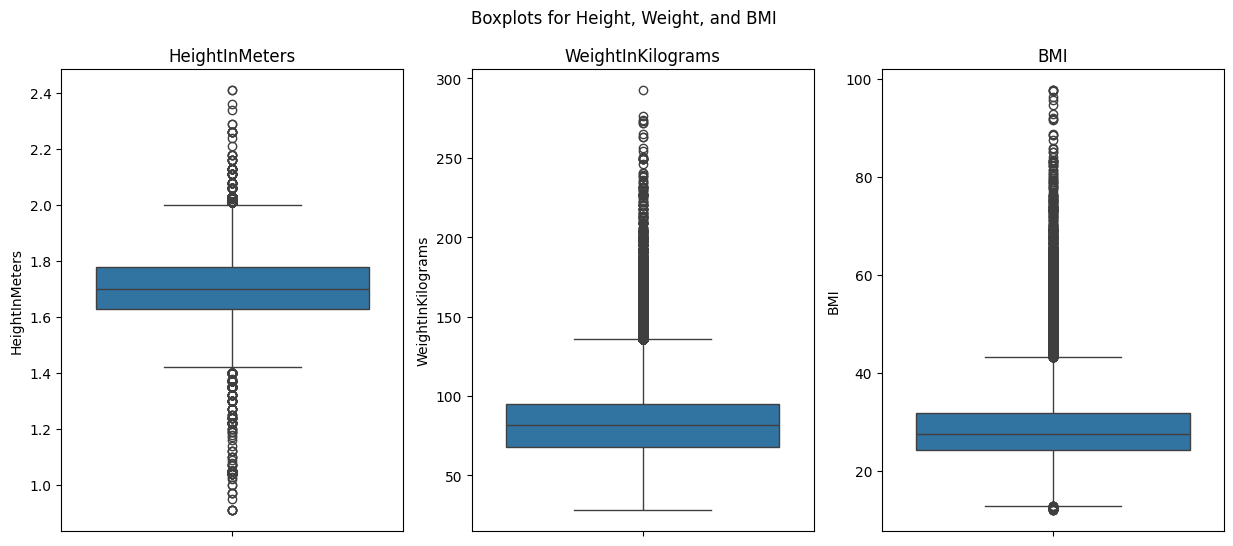

In [164]:
# Plot boxplots of the three continous numeric variables to look for obvious outliers

# create subplots
fig, axes = plt.subplots(1, 3,figsize = (15,6))

# List of columns to plot
columns = ['HeightInMeters', 'WeightInKilograms', 'BMI']

# Plot each column as a separate boxplot
for i, col in enumerate(columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(col)
  

# Add an overarching title
plt.suptitle("Boxplots for Height, Weight, and BMI")

Seems like there are some individuals with extremely high weight and BMI, these could be real though. Prevalance of of class 3 obesity (BMI>40) ~9.2% of US adults (CDC 2018 data), of these obese individuals some smaller subset (<0.1%) have an extreme BMI >80. Out of population of 237630, we'd therefore expect roughly 237630 * 0.092 * 0.001 = 22 indivudals.

In [165]:
# Number of inidividuals we might expect to have extreme obesity (BMI > 80)
print(237630 * 0.092 * 0.001)

# Number of people in our data who have extreme obesity (BMI > 80)
len(df[df['BMI'] > 80])

21.86196


36

These numbers are quite similar to one another. In addition, our dataset isn't a random subset of the population: no individuals under 18 are in the data yet ~24% of people in the US are under age 19 see [Census 2023](https://www.census.gov/data/tables/2023/demo/age-and-sex/2023-age-sex-composition.html). Children under 19 are less likely to suffer from extreme obesity than older individuals.

In [166]:
# Distriubtion of age categories by percentage. No children under the age of 18 are in the dataset.
((df['AgeCategory'].value_counts())/237630)*100


AgeCategory
Age 65 to 69       11.592392
Age 60 to 64       10.808820
Age 70 to 74       10.497833
Age 55 to 59        9.014855
Age 50 to 54        8.060430
Age 75 to 79        7.439717
Age 80 or older     7.382906
Age 40 to 44        6.829104
Age 45 to 49        6.773135
Age 35 to 39        6.304760
Age 30 to 34        5.397046
Age 18 to 24        5.376846
Age 25 to 29        4.522156
Name: count, dtype: float64

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis (EDA)</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [167]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

## Univariate distributions of categorical variables

Fix the order othe categorical variables

In [168]:
df['AgeCategory'].value_counts()

AgeCategory
Age 65 to 69       27547
Age 60 to 64       25685
Age 70 to 74       24946
Age 55 to 59       21422
Age 50 to 54       19154
Age 75 to 79       17679
Age 80 or older    17544
Age 40 to 44       16228
Age 45 to 49       16095
Age 35 to 39       14982
Age 30 to 34       12825
Age 18 to 24       12777
Age 25 to 29       10746
Name: count, dtype: int64

In [169]:
# Correct order for AgeCategory
age_order = [
    'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39',
    'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59',
    'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79',
    'Age 80 or older'
]

# Convert AgeCategory to a categorical type with the specified order
df['AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=age_order, ordered=True)

In [170]:
# Correct order for General Health
health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

df['GeneralHealth'] = pd.Categorical(df['GeneralHealth'], categories = health_order, ordered = True)

In [171]:
#Change order for diabetes, ecigs, smoker
diabetes_order = [
    'No',
    'No, pre-diabetes or borderline diabetes', 
    'Yes, but only during pregnancy (female)', 
    'Yes'
]

ecig_order = [
    'Never used e-cigarettes in my entire life', 
    'Not at all (right now)', 
    'Use them some days', 
    'Use them every day'
]

smoker_order = [
    'Never smoked', 
    'Former smoker', 
    'Current smoker - now smokes some days', 
    'Current smoker - now smokes every day'
]


# Convert columns to categorical with the specified order
df['HadDiabetes'] = pd.Categorical(df['HadDiabetes'], categories=diabetes_order, ordered=True)
df['ECigaretteUsage'] = pd.Categorical(df['ECigaretteUsage'], categories=ecig_order, ordered=True)
df['SmokerStatus'] = pd.Categorical(df['SmokerStatus'], categories=smoker_order, ordered=True)


In [172]:
df['HadDiabetes'].value_counts()

HadDiabetes
No                                         197463
Yes                                         33055
No, pre-diabetes or borderline diabetes      5211
Yes, but only during pregnancy (female)      1901
Name: count, dtype: int64

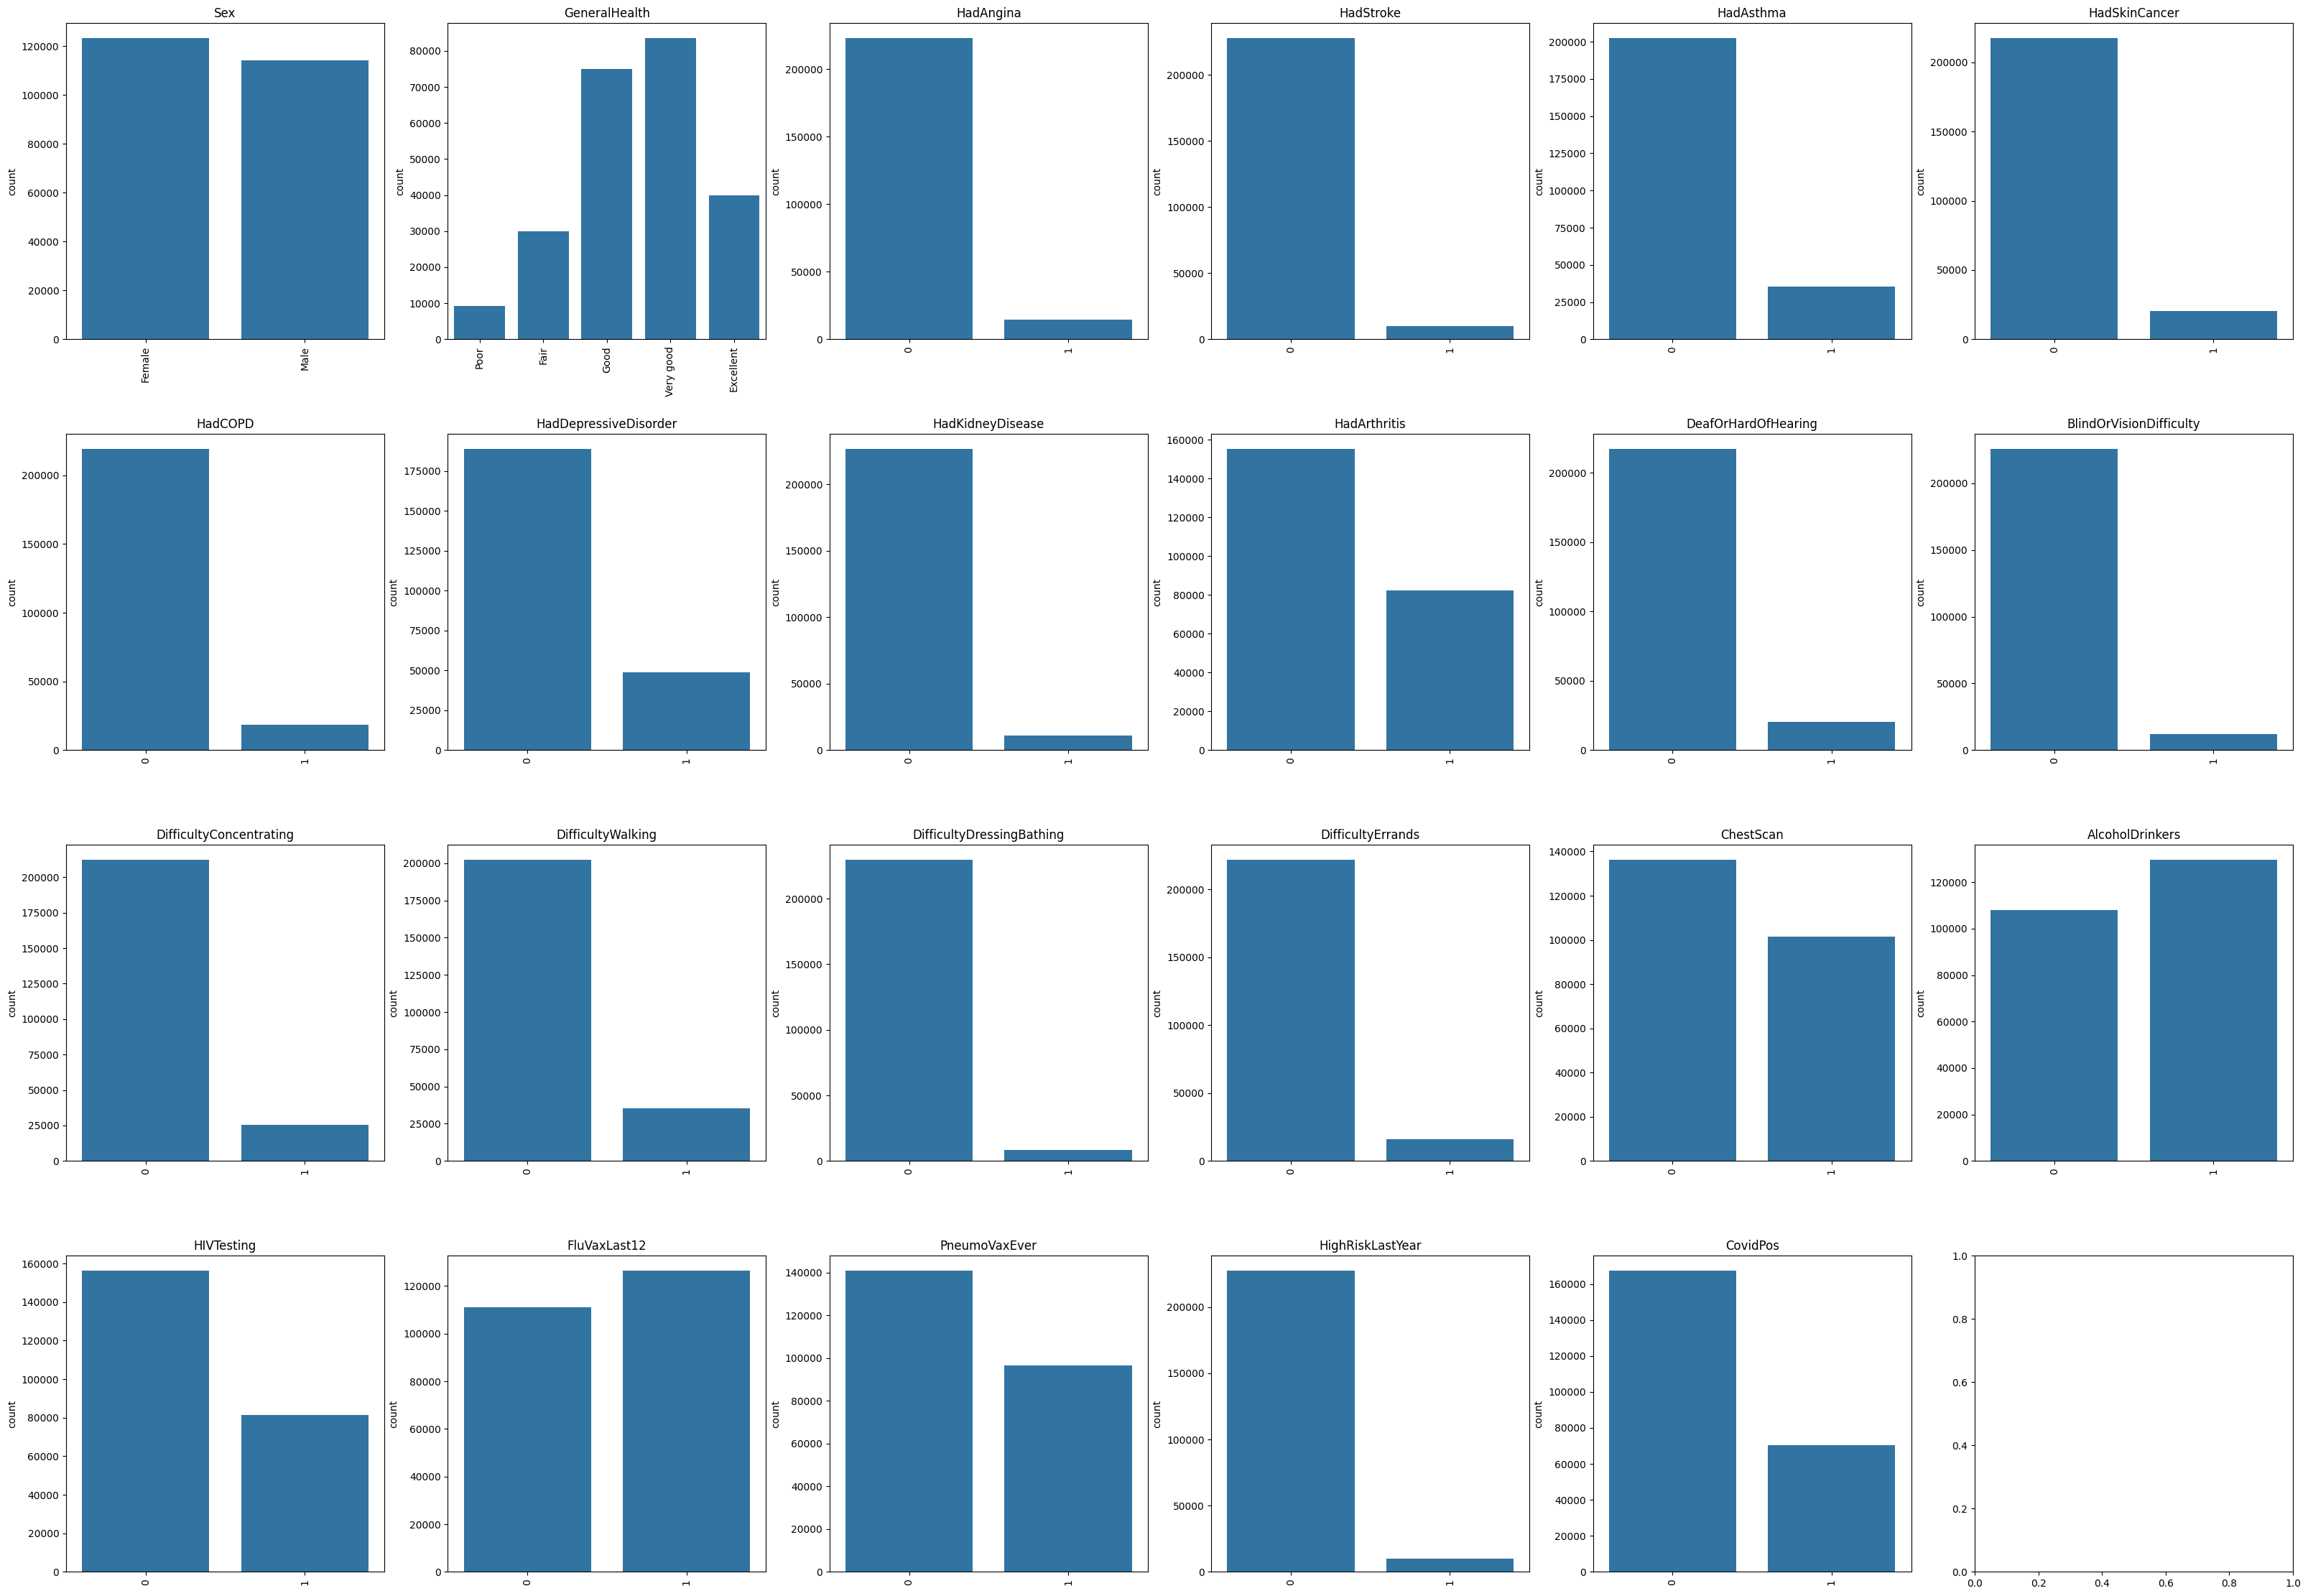

In [173]:
cat_vars1 = ['Sex','GeneralHealth','HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
        'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 
       'ChestScan',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',  'HighRiskLastYear', 'CovidPos']


fig, axes = plt.subplots(4,6, figsize = (40, 28))

#plot each categorical feature as a separate countplot
for i, col in enumerate(cat_vars1):
    row, col_idx = divmod(i, 6)
    sns.countplot(x = col, data = df, ax= axes[row, col_idx])
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].tick_params(axis='x', rotation=90)
    axes[row, col_idx].set_xlabel("") 

plt.subplots_adjust(hspace=0.3)
plt.show()


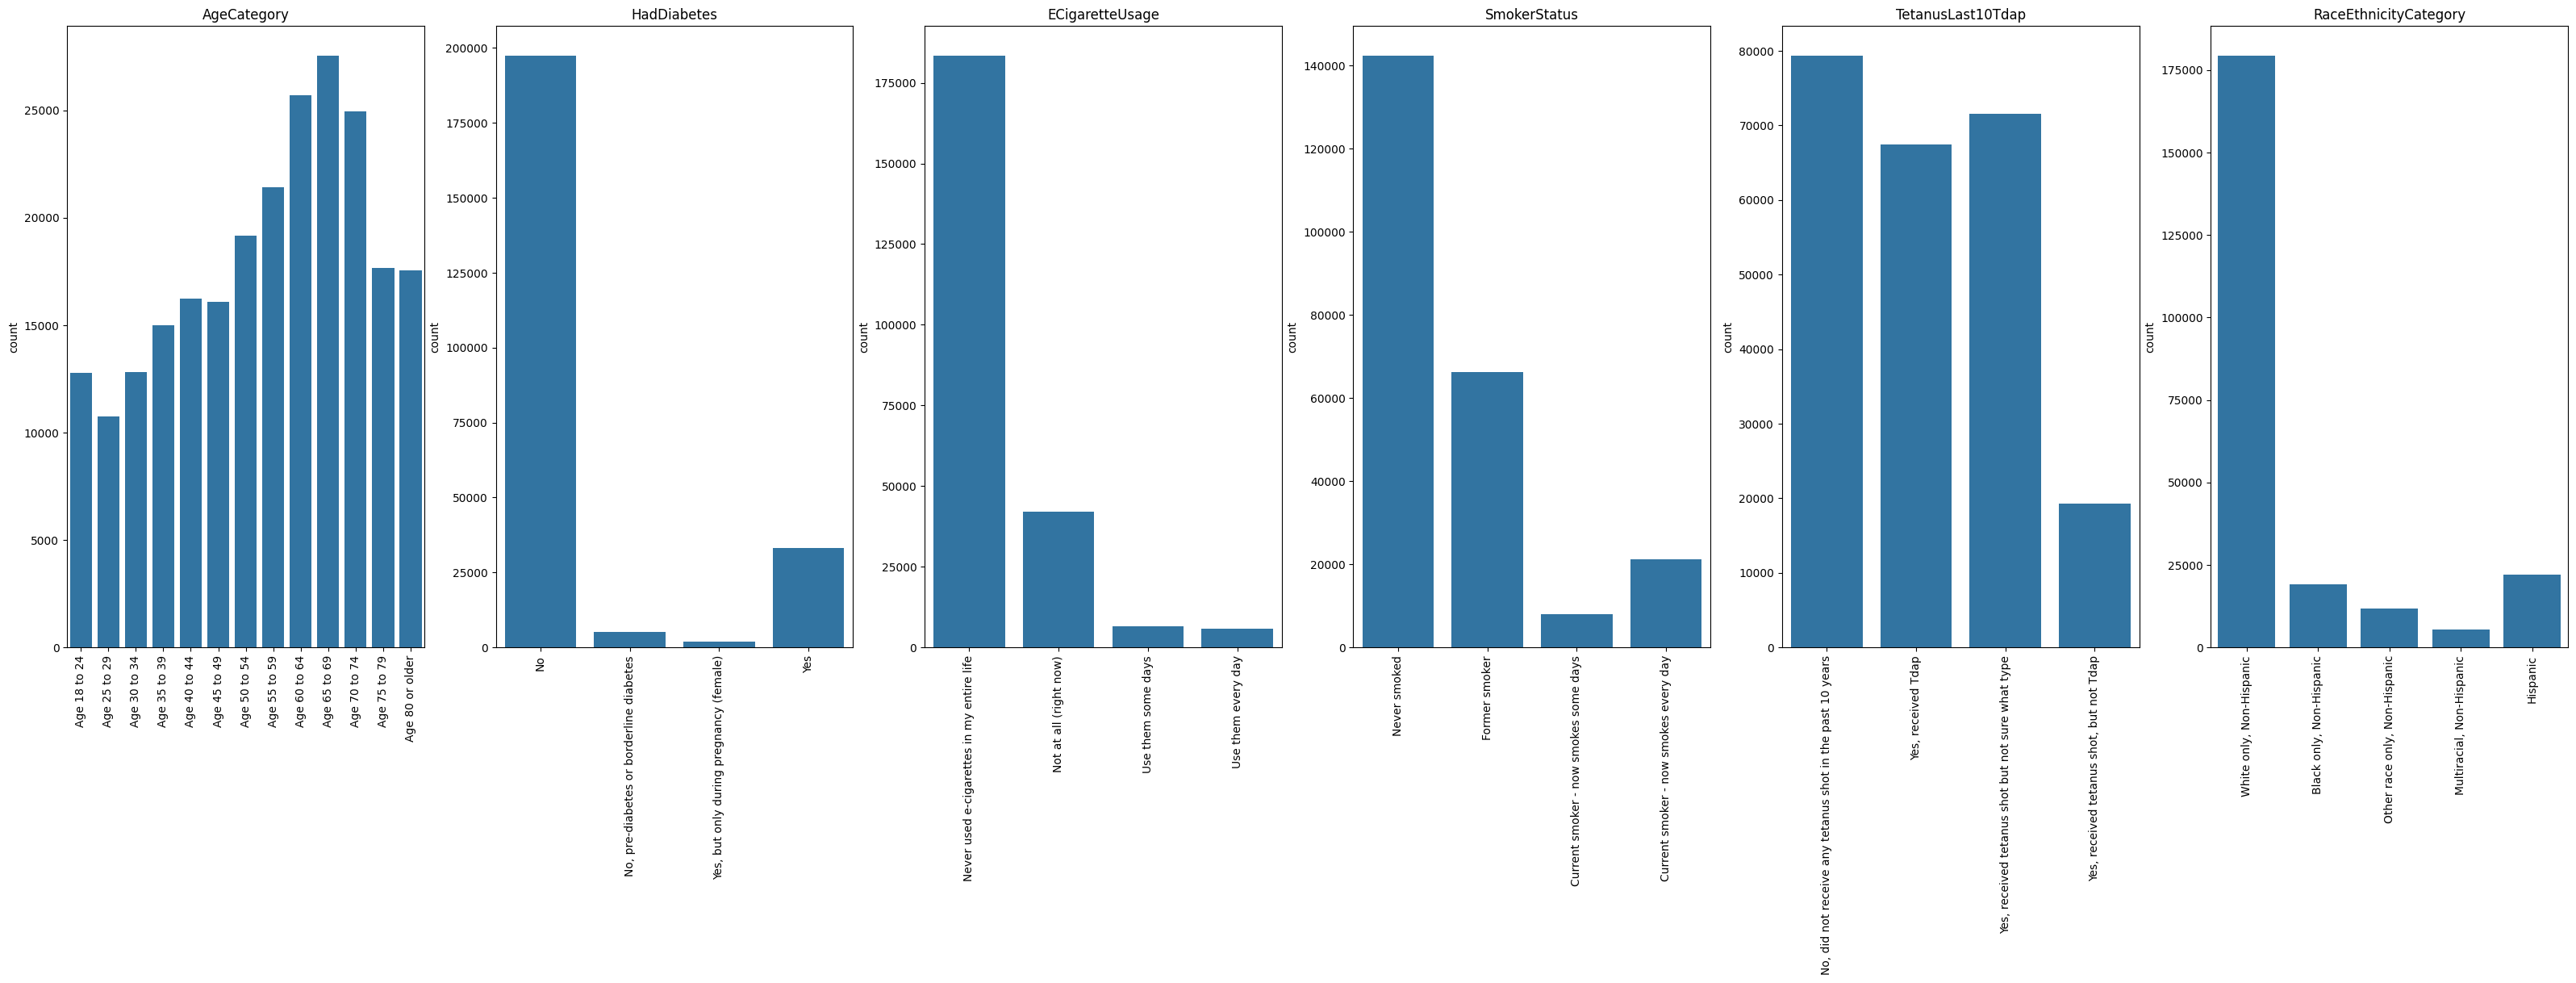

In [174]:
cat_vars2 = ['AgeCategory','HadDiabetes', 'ECigaretteUsage', 'SmokerStatus','TetanusLast10Tdap','RaceEthnicityCategory']

fig, axes = plt.subplots(1,6, figsize = (40, 10))

#plot each categorical feature as a separate countplot
for i, col in enumerate(cat_vars2):
    sns.countplot(x = col, data = df, ax= axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel("") 

plt.show()

## Associations with the target variable

### Demographic characteristics

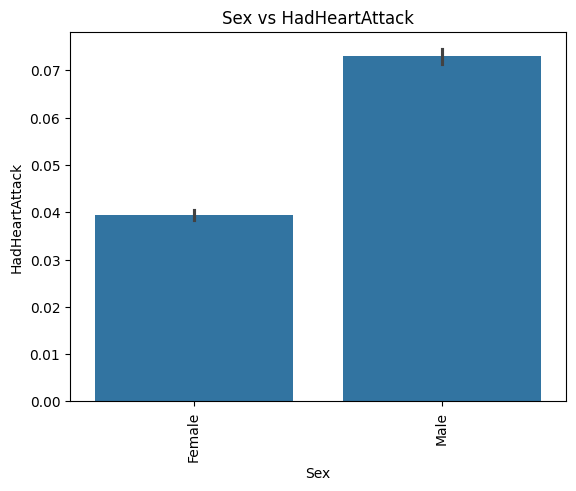

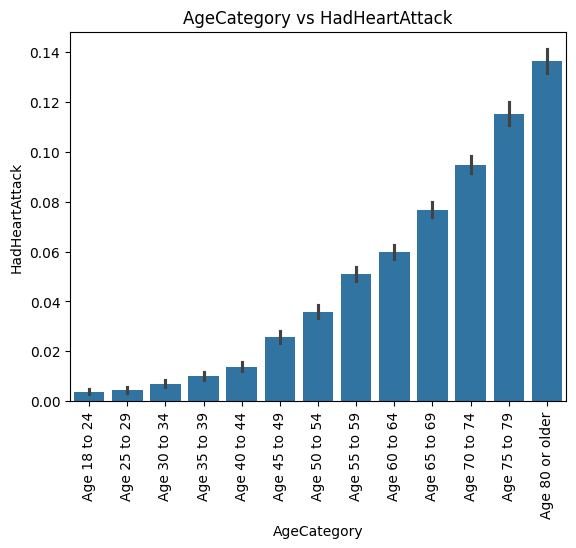

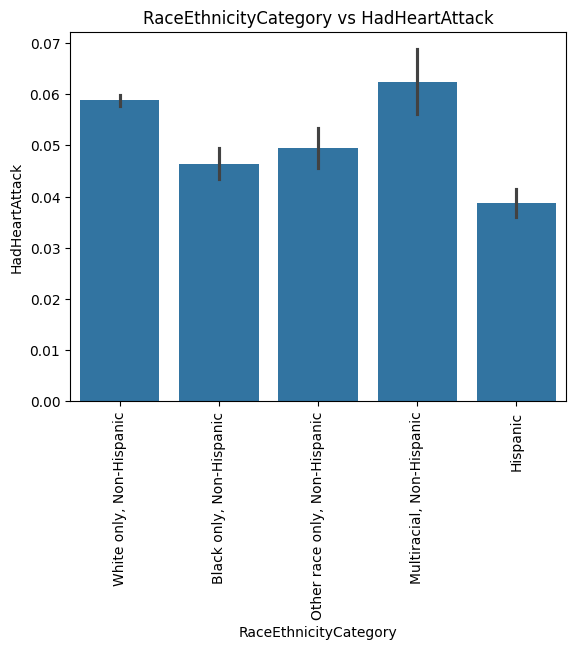

In [175]:
for col in ['Sex', 'AgeCategory', 'RaceEthnicityCategory']:
    sns.barplot(x=col, y='HadHeartAttack', data=df)
    plt.xticks(rotation = 90)
    plt.title(f'{col} vs HadHeartAttack')
    plt.show()

Age is a strong risk factor for heart attacks, and males are much more likely than females to have had a heartattack. Not much differences by race or ethnicity though

### Behavioural characteristics

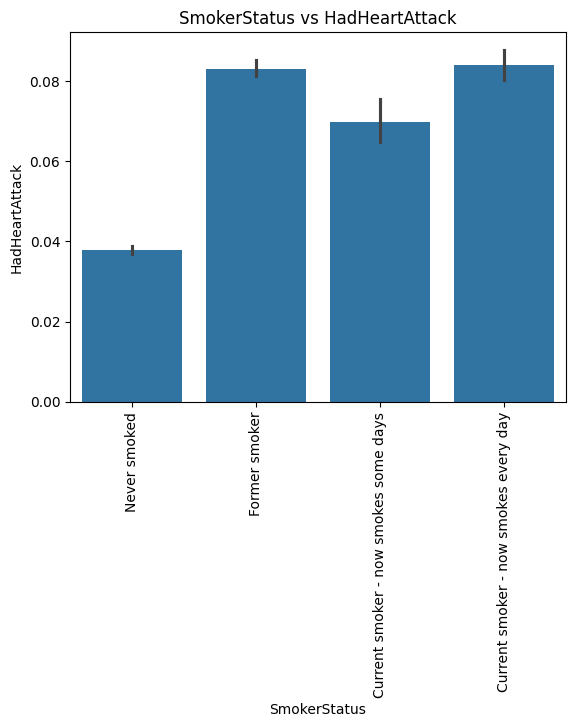

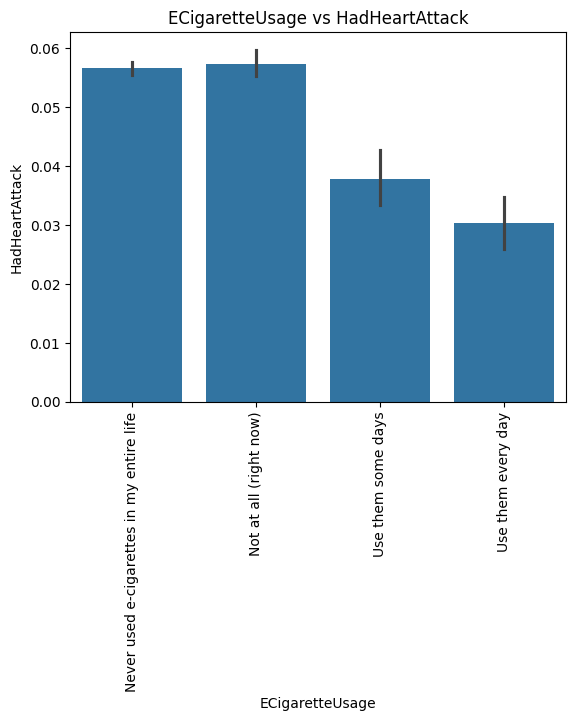

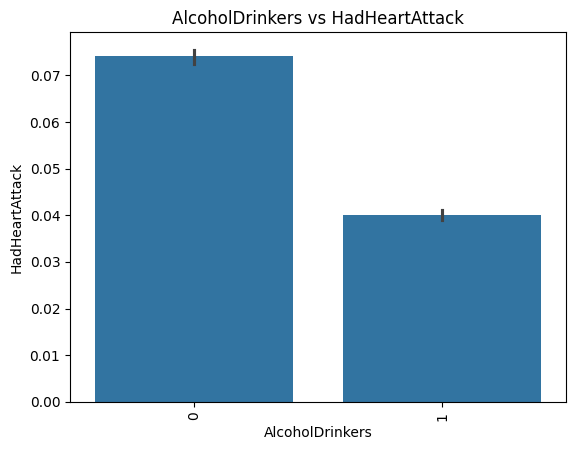

In [176]:
for col in ['SmokerStatus', 'ECigaretteUsage','AlcoholDrinkers']:
    sns.barplot(x = col, y = 'HadHeartAttack', data = df)
    plt.xticks(rotation = 90)
    plt.title(f'{col} vs HadHeartAttack')
    plt.show()

Smoking is a risk, but it doesn't seem to matter too much whether the individual formerly smoked or is a current smoker. Ecigarette usage looks protective of heart attacks, but this is likely because users of Ecigarettes are also younger. Surprisingly, alcohol usage also seems to be protective (this could because of age again)

### Health characteristics and their association with having a heart attack

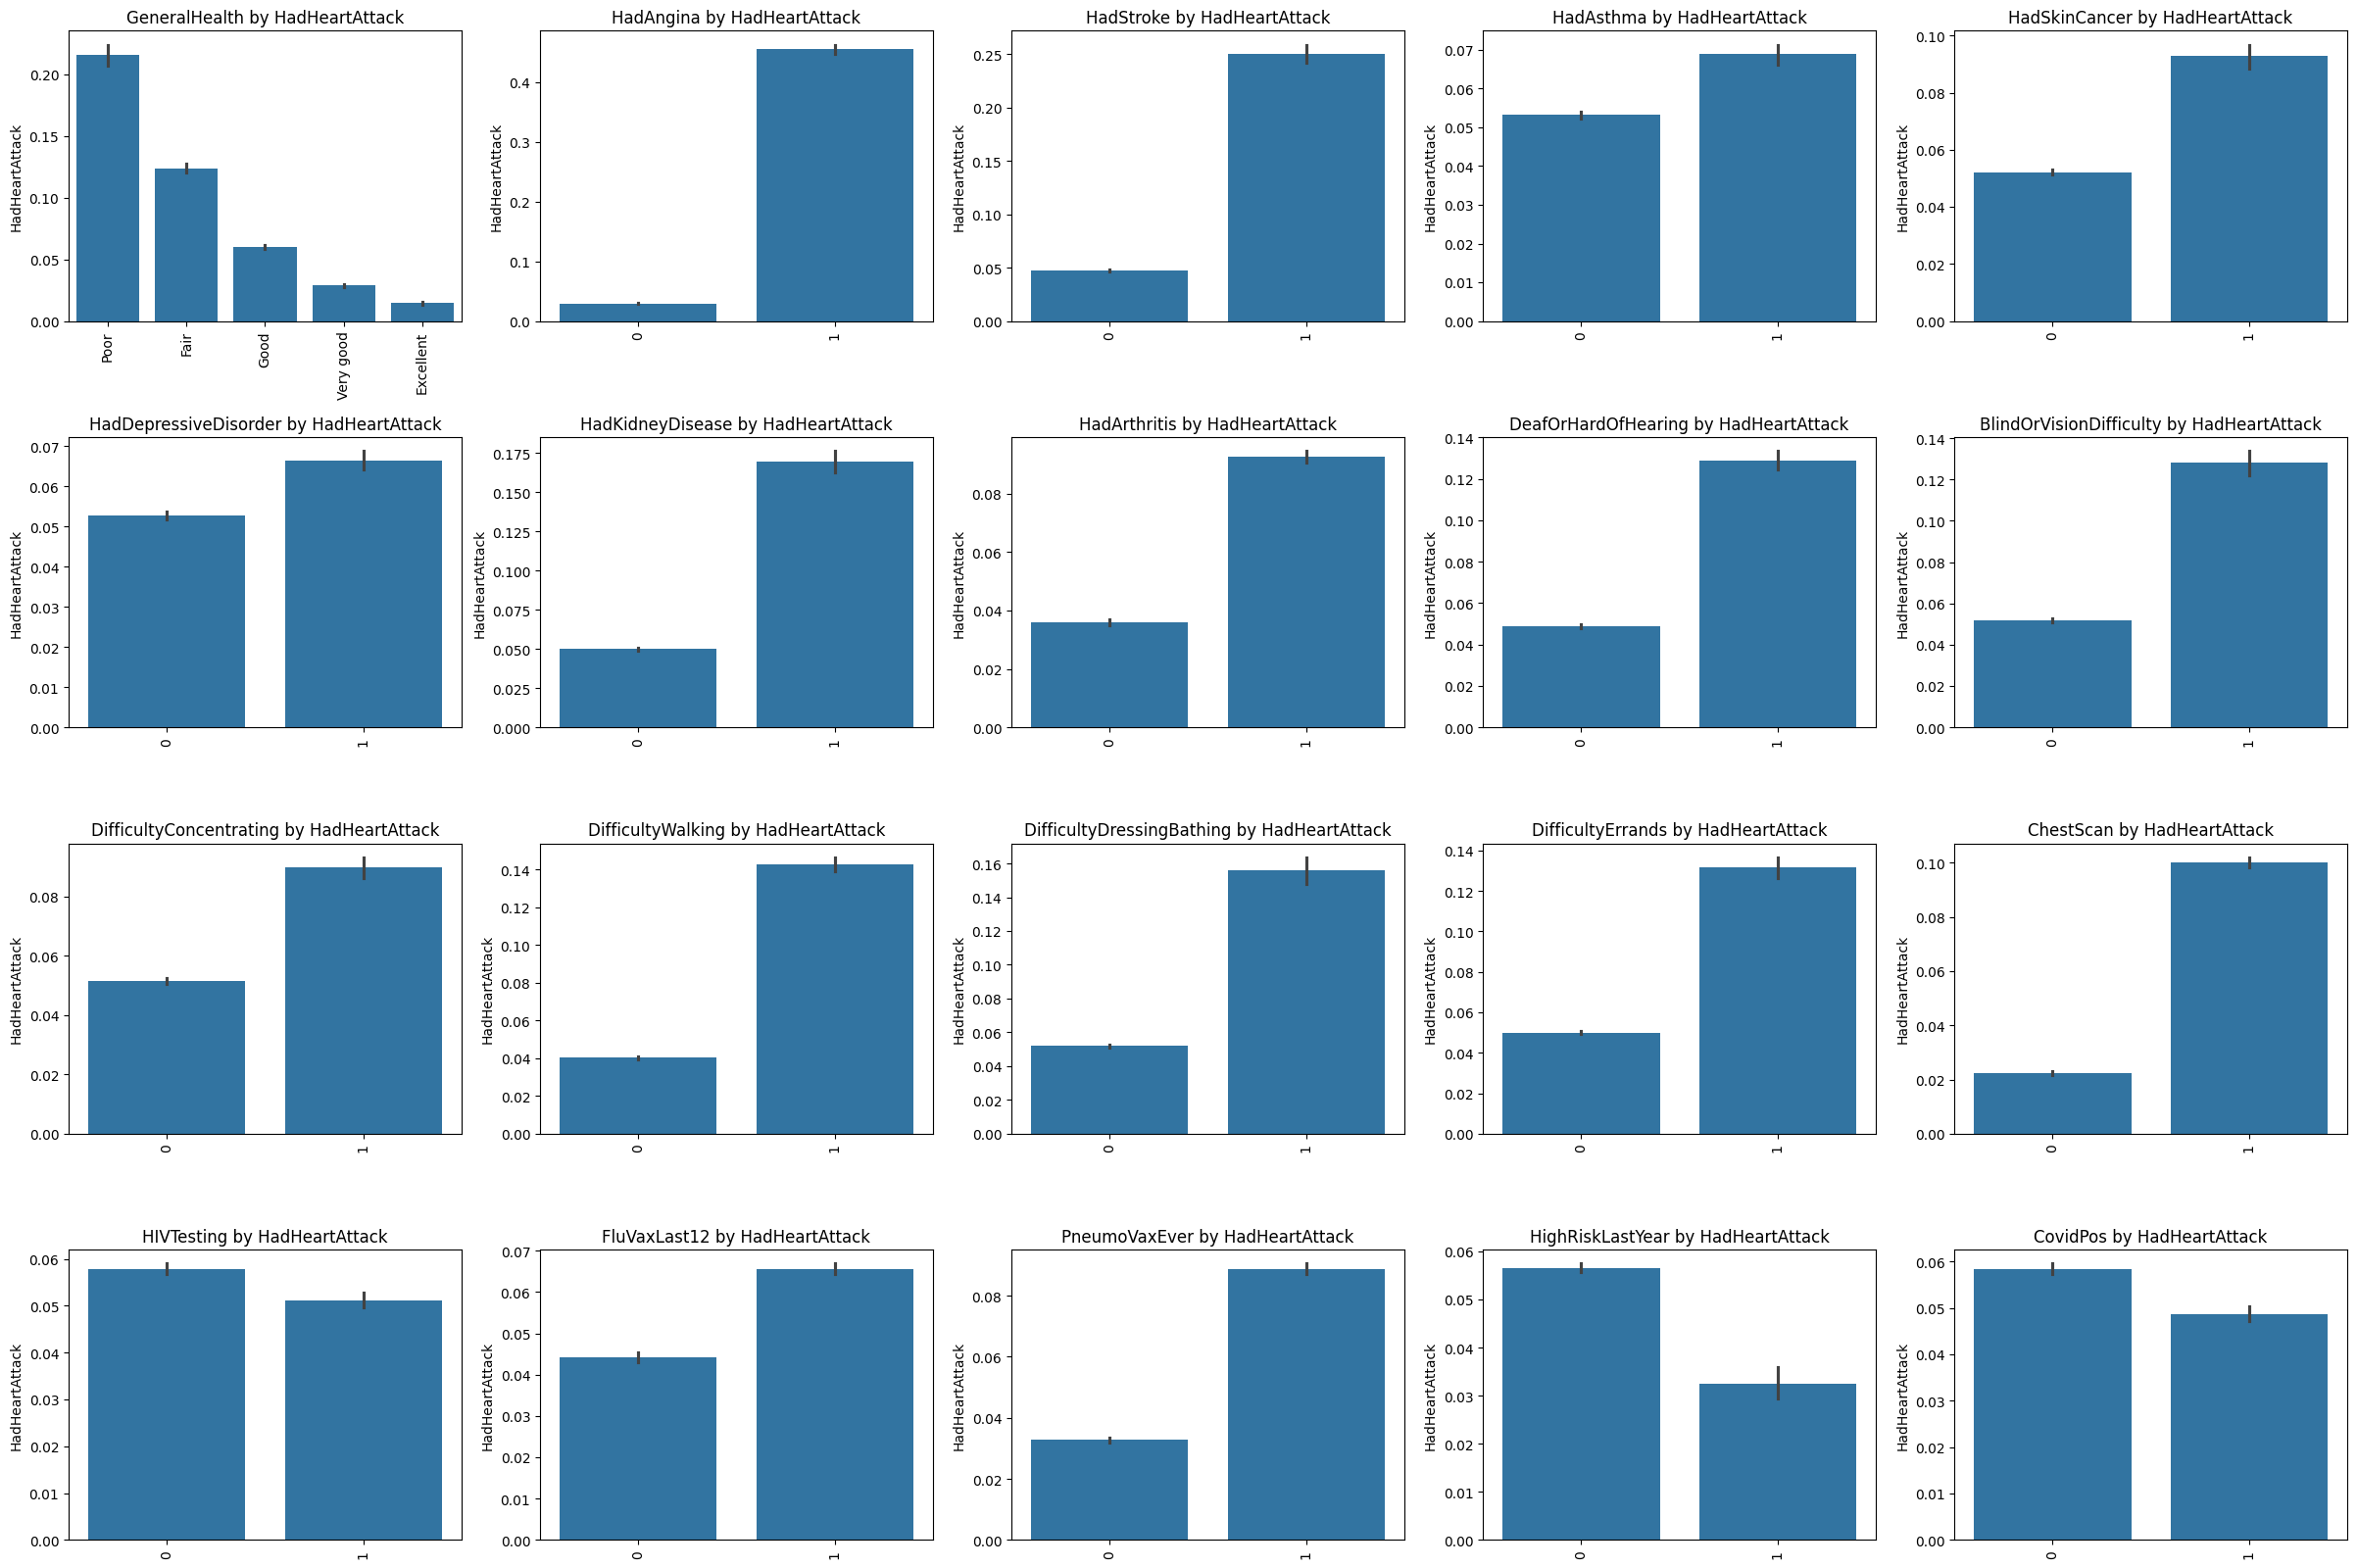

In [177]:
cat_vars3 = ['GeneralHealth','HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
        'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 
       'ChestScan',
        'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',  'HighRiskLastYear', 'CovidPos']


fig, axes = plt.subplots(4,5, figsize = (30, 20))

#plot each categorical feature as a separate countplot
for i, col in enumerate(cat_vars3):
    row, col_idx = divmod(i, 5)
    sns.barplot(x = col, y= 'HadHeartAttack', data = df, ax= axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} by HadHeartAttack')
    axes[row, col_idx].tick_params(axis='x', rotation=90)
    axes[row, col_idx].set_xlabel("") 

plt.subplots_adjust(hspace=0.4)
plt.show()

There appear to be clear differences in risk of heart attack depending on many of these health characteristics. Many of these are also likely associated with increasing age, howver, so it's difficult to distinguish between these two effects in these plots. Below, I plot the same but grouped now by age category, to show where the differences are being driven only by age, or where there are additional effects

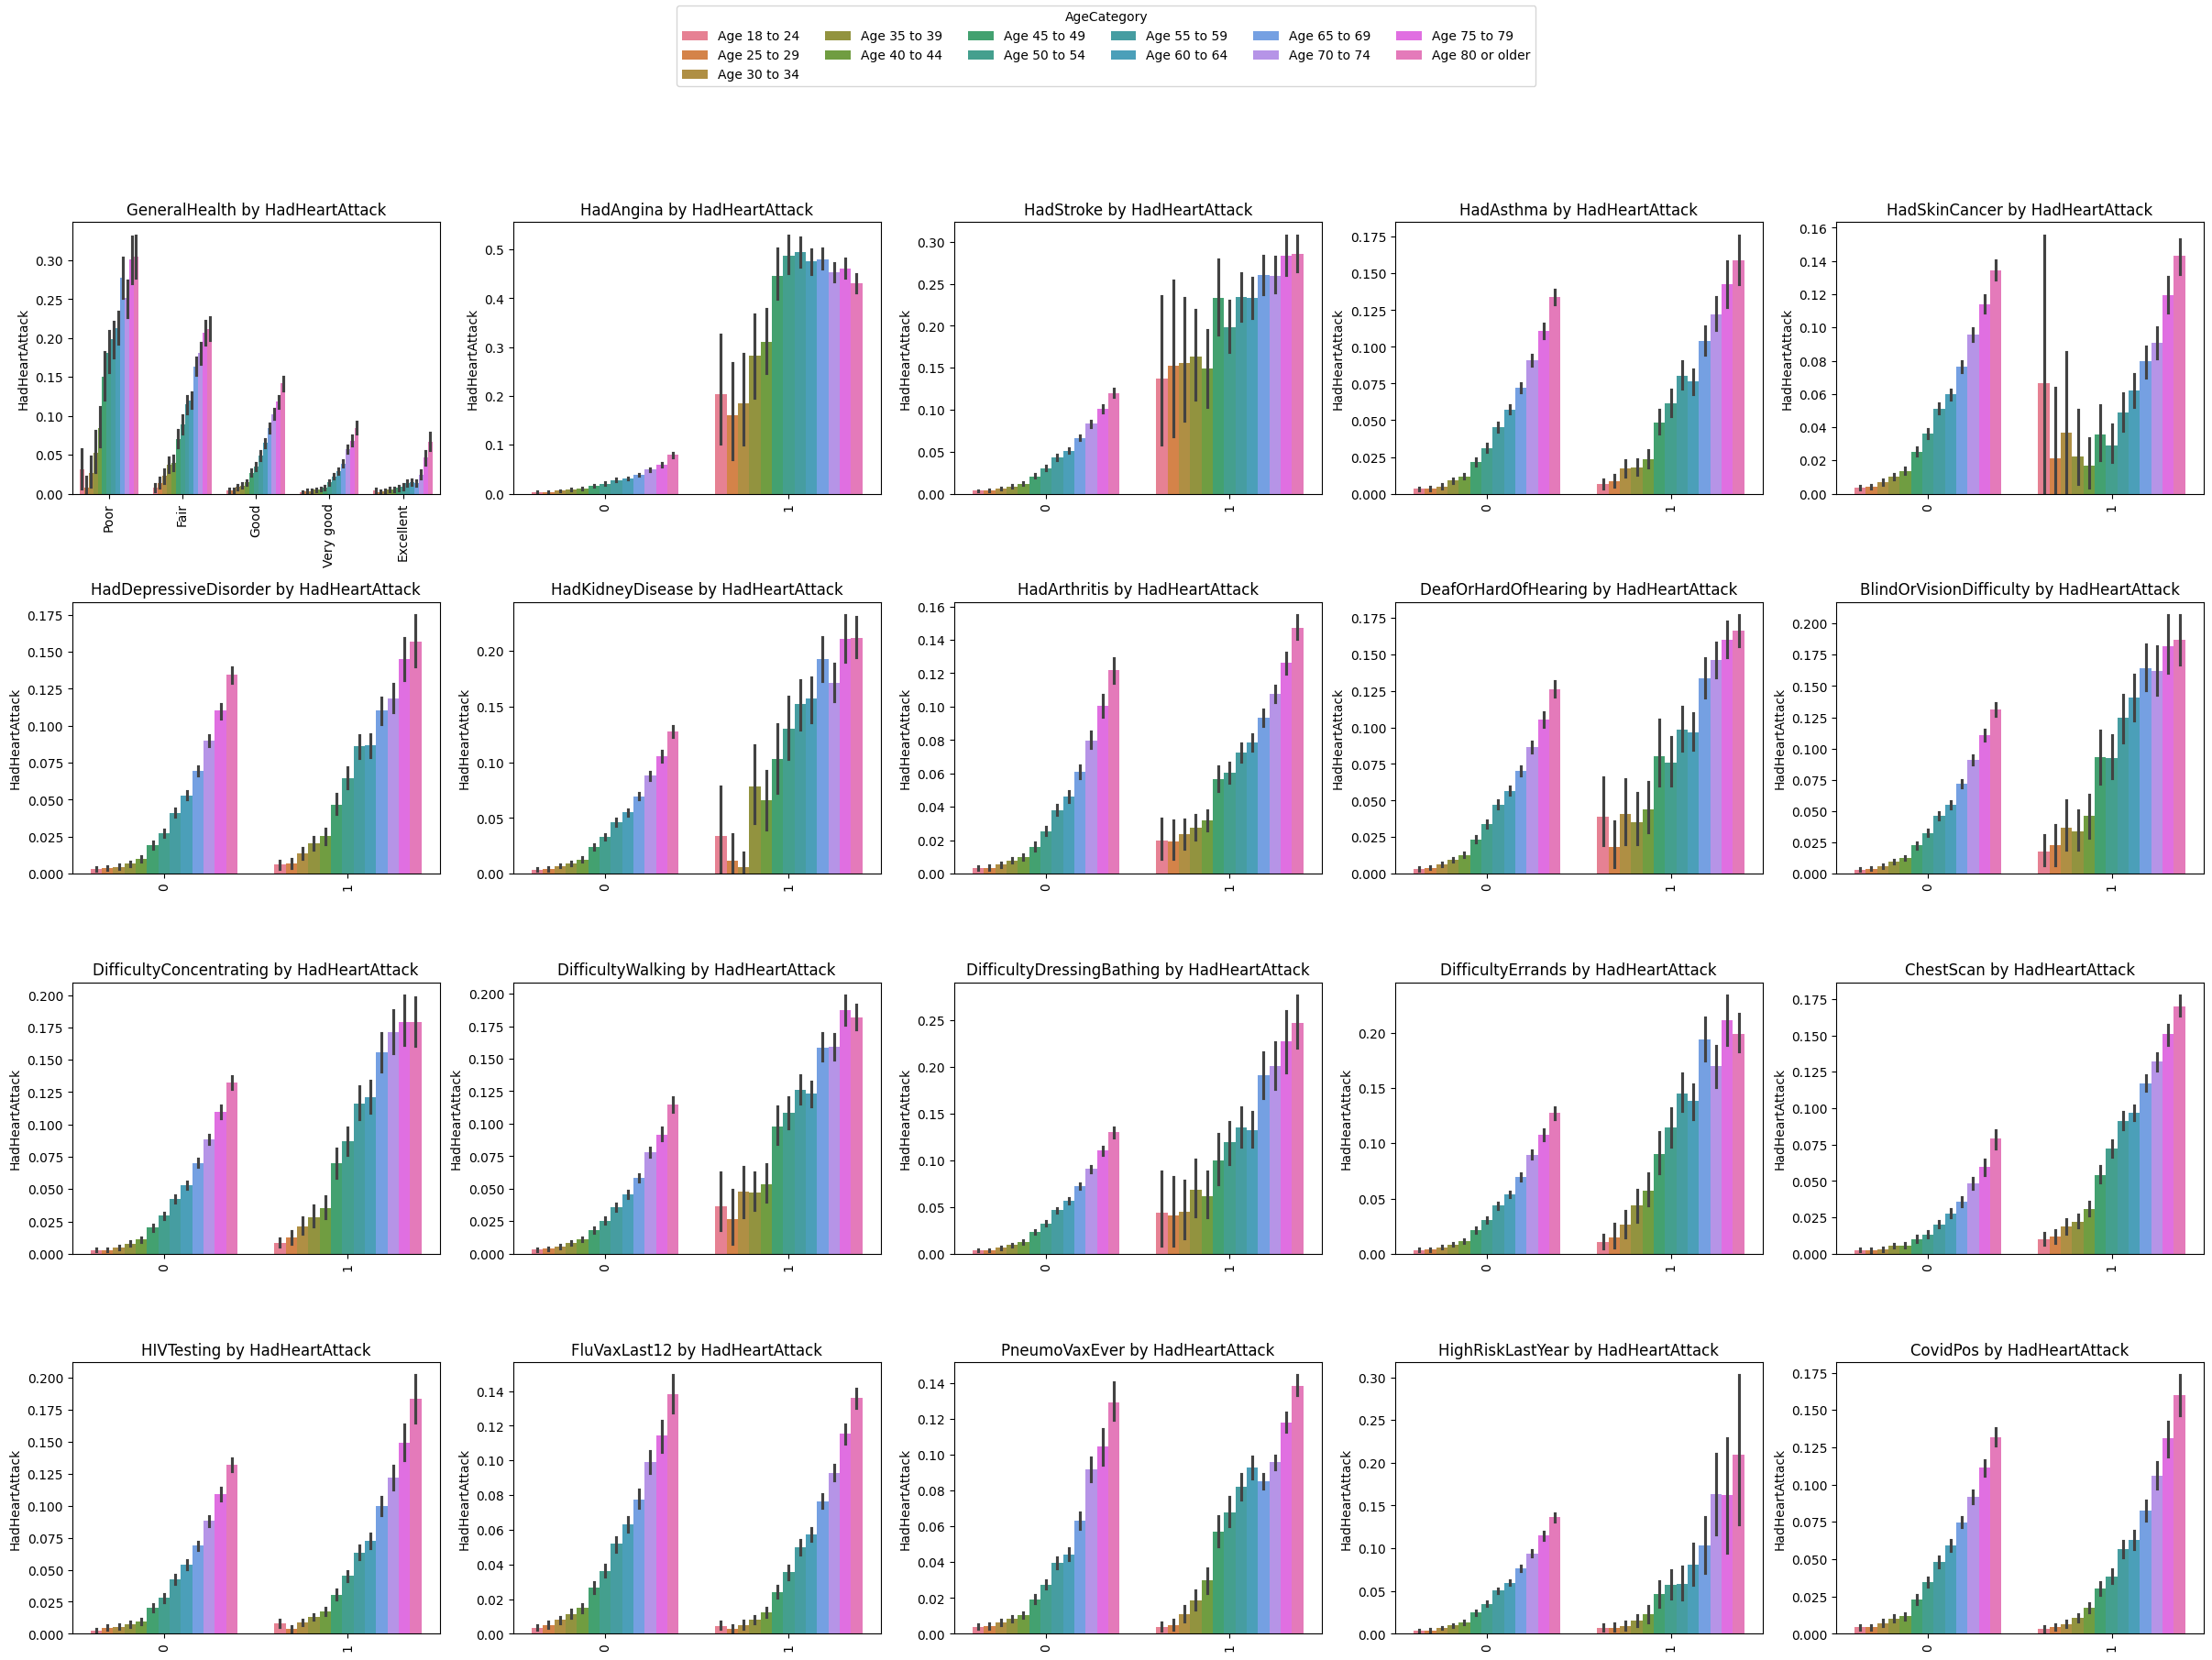

In [178]:
fig, axes = plt.subplots(4,5, figsize = (30, 20))

#plot each categorical feature as a separate countplot
for i, col in enumerate(cat_vars3):
    row, col_idx = divmod(i, 5)
    sns.barplot(x = col, y= 'HadHeartAttack', hue= 'AgeCategory', data = df, ax= axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} by HadHeartAttack')
    axes[row, col_idx].tick_params(axis='x', rotation=90)
    axes[row, col_idx].set_xlabel("") 
    axes[row, col_idx].get_legend().remove()

# Add a single legend to the figure
handles, labels = axes[0, 0].get_legend_handles_labels()  # Get legend from the first subplot
fig.legend(handles, labels, title='AgeCategory', loc='upper center', ncol=6)

plt.subplots_adjust(hspace=0.4)
plt.show()


Grouping by age, we can see General Health is still a strong predictor of whether an individual has had a heart attack or not. Stroke and most especially angina are also associated with higher risk, other conditions show weaker effects

### Continuous variables like height, weight, and BMI on heart attack likelihood

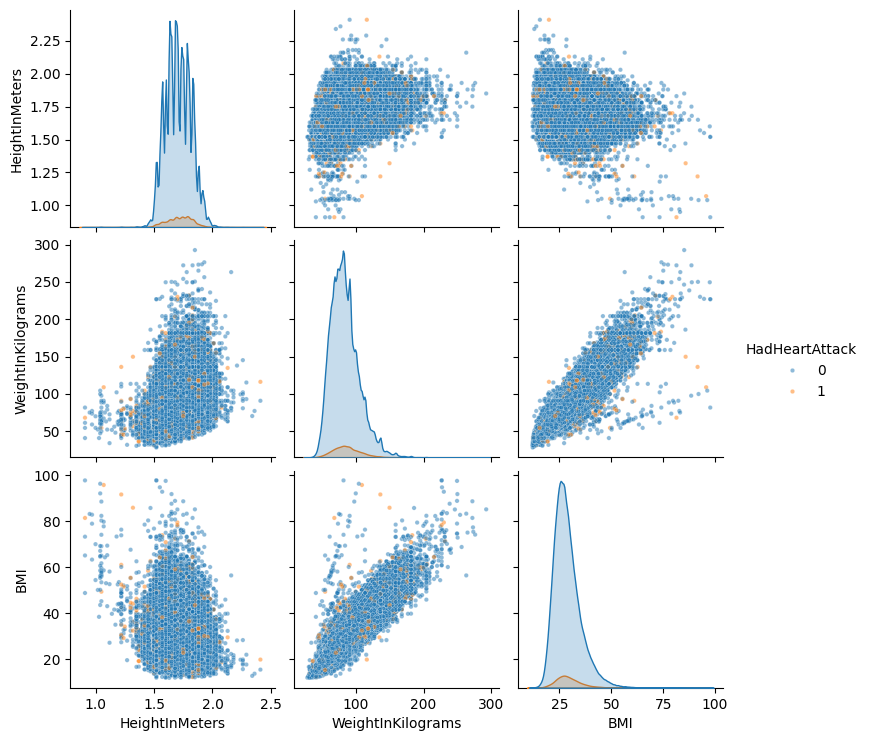

In [179]:
sns.pairplot(df, vars=['HeightInMeters', 'WeightInKilograms', 'BMI'], hue='HadHeartAttack', plot_kws={'alpha': 0.5, 's':10} )
plt.show()

There doesn't seem to be any obvious patterns here, the distributions of height, weight and BMI appear similar among the HadHeartAttack = 0 and HadHeartAttack = 1 groups

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">4. Scaling, Categorical Variables, and Splitting</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>


## 4.1 Encoding categorical variables

### AgeCategory needs to be encoded 
This is an ordinal feature so ordinal encoding should work well for tree models I want to try, won't work as well with linear models

In [180]:
# Encode AgeCategory. Try ordinal encoding (should work well for tree, mught not work so well for linear models)
df['age'] = df['AgeCategory'].map({'Age 18 to 24': 0,
                                   'Age 25 to 29': 1,
                                   'Age 30 to 34': 2,
                                   'Age 35 to 39': 3,
                                   'Age 40 to 44': 4,
                                   'Age 45 to 49': 5,
                                   'Age 50 to 54': 6,
                                   'Age 55 to 59': 7,
                                   'Age 60 to 64': 8,
                                   'Age 65 to 69': 9,
                                   'Age 70 to 74': 10,
                                   'Age 75 to 79': 11,
                                   'Age 80 or older': 12})

df.drop('AgeCategory', axis = 1, inplace = True)

### Encode smoker status. Try ordinal encoding first (since we assume some ordinaliry in risk) to make model training and testing more efficient


In [181]:
# Ordinal Encoding for SmokerStatus
df['smoker'] = df['SmokerStatus'].map({"Never smoked": 0,
                                       "Former smoker": 1,
                                        "Current smoker - now smokes some days": 2,
                                        "Current smoker - now smokes every day": 3})
df.drop('SmokerStatus', axis = 1, inplace = True)

### Encode sex through binary encoding (no need to one-hot encode as only 2 categories)

In [182]:

df['sex'] = df['Sex'].map({'Female': 0, 'Male': 1})
df.drop('Sex', axis = 1, inplace = True)


### Ordinally encode GeneralHealth feature


In [183]:
df['gen_health'] = df['GeneralHealth'].map({'Excellent': 0,
                                               'Very good': 1,
                                               'Good': 2,
                                               'Fair': 3,
                                               'Poor': 4})

df.drop('GeneralHealth', axis = 1, inplace = True)

### Encode HadDiabetes

In [184]:
df['HadDiabetes'].value_counts()

HadDiabetes
No                                         197463
Yes                                         33055
No, pre-diabetes or borderline diabetes      5211
Yes, but only during pregnancy (female)      1901
Name: count, dtype: int64

In [185]:
df['diabetes_binary'] = df['HadDiabetes'].map({
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes': 1,
    'Yes, but only during pregnancy (female)': 1
})

df.drop('HadDiabetes', axis = 1, inplace = True)

### Encode ECigaretteUsage
Also has some ordinality, encode as such

In [186]:
df['ECigaretteUsage'].value_counts()

ECigaretteUsage
Never used e-cigarettes in my entire life    183446
Not at all (right now)                        41963
Use them some days                             6468
Use them every day                             5753
Name: count, dtype: int64

In [187]:
df['ECigaretteUsage'] = df['ECigaretteUsage'].map({'Never used e-cigarettes in my entire life':0,
                                                   'Not at all (right now)': 1,
                                                   'Use them some days': 2,
                                                   'Use them every day': 3})

In [188]:
df['ECigaretteUsage'].value_counts()

ECigaretteUsage
0    183446
1     41963
2      6468
3      5753
Name: count, dtype: int64

### Tetatnus jab

In [189]:
df['TetanusLast10Tdap'].value_counts()

TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    79370
Yes, received tetanus shot but not sure what type            71538
Yes, received Tdap                                           67418
Yes, received tetanus shot, but not Tdap                     19304
Name: count, dtype: int64

In [190]:
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].map({'No, did not receive any tetanus shot in the past 10 years': 0,
                                                       'Yes, received tetanus shot but not sure what type': 1,
                                                       'Yes, received Tdap': 1,
                                                       'Yes, received tetanus shot, but not Tdap': 1})

In [191]:
df['TetanusLast10Tdap'].value_counts(dropna = False)

TetanusLast10Tdap
1    158260
0     79370
Name: count, dtype: int64

Race/ethinicity does not seem important as a feature in this data (see figure above), drop it. Also drop State and PatientID

In [192]:
df.drop(['RaceEthnicityCategory','State','PatientID'], axis = 1, inplace = True)

### Convert all categorical columns to numeric

In [193]:

categorical_columns = df.select_dtypes(include=['category']).columns

# Apply conversion for both train and test sets
df[categorical_columns] = df[categorical_columns].apply(lambda col: col.astype('int'))

In [194]:
print(df.dtypes)


HeightInMeters               float64
WeightInKilograms            float64
BMI                          float64
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
ECigaretteUsage                int32
ChestScan                      int64
AlcoholDrinkers                int64
HIVTesting                     int64
FluVaxLast12                   int64
PneumoVaxEver                  int64
TetanusLast10Tdap              int64
HighRiskLastYear               int64
CovidPos                       int64
a

## 4.2 Splitting
Split the data into training and testing sets to avoid data leakage


In [195]:
df['HadHeartAttack'].value_counts()

HadHeartAttack
0    224429
1     13201
Name: count, dtype: int64

Target variable is highly imbalanced, need to stratify our split

In [196]:
df.columns

Index(['HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage',
       'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos',
       'age', 'smoker', 'sex', 'gen_health', 'diabetes_binary'],
      dtype='object')

In [197]:
X = df.drop('HadHeartAttack', axis = 1)
y = df['HadHeartAttack']

In [198]:
X.shape, y.shape

((237630, 31), (237630,))

In [199]:
X.head()

,HeightInMeters,WeightInKilograms,BMI,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,...,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,age,smoker,sex,gen_health,diabetes_binary
0,1.63,84.820000,32.099998,1,0,1,1,0,0,0,...,0,1,0,0,1,11,1,0,3,1
1,1.60,71.669998,27.990000,0,0,0,0,0,0,0,...,1,1,1,0,0,9,1,0,1,0
2,1.78,71.209999,22.530001,0,0,0,0,0,0,0,...,0,0,1,0,0,8,0,1,0,0
3,1.78,95.250000,30.129999,0,0,0,0,0,0,0,...,1,1,1,0,0,10,1,1,1,1
4,1.68,78.019997,27.760000,0,0,0,0,0,0,0,...,1,0,0,0,0,6,0,0,2,0


In [200]:

# split the data into train test split. Stratify the target variable so that the split leads to balanced classes in both train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

## Scaling the data for disance/logistic regression models

In [201]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Calculate ratio of the classes for model parameters (e.g. logistic regression, XGBoost)

In [202]:
# Calculate scale_pos_weight for imbalanced dataset for XGBoost model
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Model evaluation metric choice rationale

I have generally favoured Precision-Recall AUC when testing different models for compartive evaluation, because it emphasises performance on the positive class (ignores TNs) and isn't as misleading as ROC AUC for imbalanced datasets, before setting a decision threshold. ROC AUC can be misleading for imbalanced datasets (because FPR will be small given TN cases are common: FPR = FP/FP+TN. FNs are more cotsly in these kinds of problems, so have favoured PR AUC and Recall over ROC AUC and Accuracy 

# Linear models and kernel-based models

Logistic Regression
- With regularization (L1/L2 penalties to prevent overfitting).
- Add class weights to handle imbalances

Support Vector Machines
- Large dataset so training likely to be too long to fine-tune
- Adjust class weights for imbalanced dataset

## Support Vector Machines

In [203]:
# Initialise and fit an SVC model

# Initialize SVM with balanced class weights (adjusts penalty for misclassification for each class) and probability outputs enabled
svm_clf = svm.SVC(class_weight='balanced', probability=True, random_state=42) # probability True means provide a probability estimate by Platt scaling

# Fit the model on the scaled training data - distance based models work better using scaled data!
svm_clf.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_pred_train = svm_clf.predict(X_train_scaled)
y_pred_test = svm_clf.predict(X_test_scaled)
y_pred_proba_train = svm_clf.predict_proba(X_train_scaled)[:, 1]  # Predicted probabilities for the positive class
y_pred_proba_test = svm_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate F1 score
F1_train = f1_score(y_train, y_pred_train)
F1_test = f1_score(y_test, y_pred_test)
print(f"F1 score train: {F1_train:.2f}")
print(f"F1 score test: {F1_test:.2f}")

# Calculate Recall
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
print(f"Recall train: {recall_train:.2f}")
print(f"Recall test: {recall_test:.2f}")

# Calculate Precision
Precision_train = precision_score(y_train, y_pred_train)
Precision_test = precision_score(y_test, y_pred_test)
print(f"Precision train: {Precision_train:.2f}")
print(f"Precision test: {Precision_test:.2f}")

# Calculate PR AUC
pr_auc_train = average_precision_score(y_train, y_pred_proba_train)
pr_auc_test = average_precision_score(y_test, y_pred_proba_test)
print(f"PR AUC train: {pr_auc_train:.2f}")
print(f"PR AUC test: {pr_auc_test:.2f}")

F1 score train: 0.46
F1 score test: 0.35
Recall train: 0.86
Recall test: 0.65
Precision train: 0.32
Precision test: 0.24
PR AUC train: 0.47
PR AUC test: 0.27


Training time: 234minutes
Some evidence of overfitting - needs fine-tuning but takes ~4hours to train once!

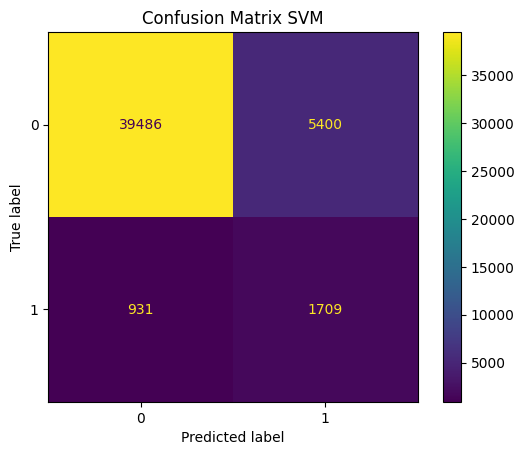

In [204]:

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.title("Confusion Matrix SVM")
plt.show()

## Logistic regression

In [205]:
# Initialize Logistic Regression model with class weights
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Train the model
logreg.fit(X_train_scaled, y_train)

# predict classes
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

# Predict probabilities
y_train_probs = logreg.predict_proba(X_train_scaled)[:, 1]  # Probabilities for class 1
y_test_probs = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate model performance
# Training Metrics
f1_train = f1_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
pr_auc_train = average_precision_score(y_train, y_train_probs)

# Testing Metrics
f1_test = f1_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
pr_auc_test = average_precision_score(y_test, y_test_probs)

metrics = {
    "Model": "Logistic Regression",
    "F1 Score Train": round(f1_train, 2),
    "F1 Score Test": round(f1_test, 2),
    "Recall Train": round(recall_train, 2),
    "Recall Test": round(recall_test, 2),
    "Precision Train": round(precision_train, 2),
    "Precision Test": round(precision_test, 2),
    "PR AUC train": round(pr_auc_train, 2),
    "PR AUC test": round(pr_auc_test, 2)
}

metrics



{'Model': 'Logistic Regression',
 'F1 Score Train': 0.34,
 'F1 Score Test': 0.34,
 'Recall Train': 0.77,
 'Recall Test': 0.76,
 'Precision Train': 0.22,
 'Precision Test': 0.22,
 'PR AUC train': 0.41,
 'PR AUC test': 0.4}

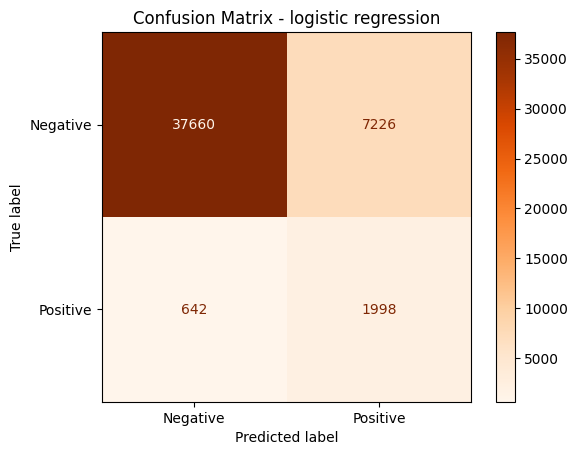

In [206]:
# look at confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Negative", "Positive"])
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - logistic regression")
plt.show()

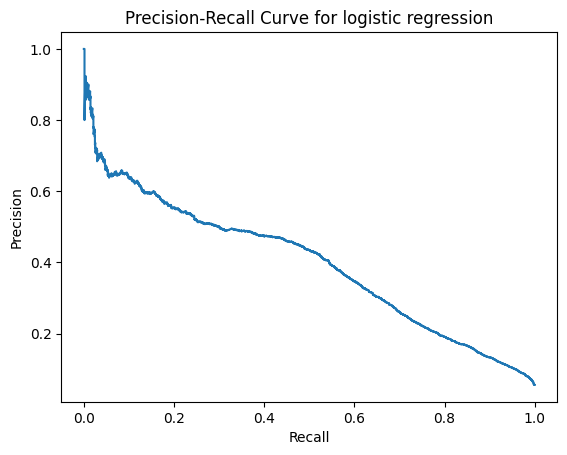

In [207]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for logistic regression')
plt.show()

# Decision Tree-based models 

## Random Forest

In [208]:
# initialise the RF classifier
rf_clf = RandomForestClassifier(class_weight = 'balanced', random_state = 42)

# train the model
rf_clf.fit(X_train, y_train)

# make predicitons
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)
y_pred_proba_train = rf_clf.predict_proba(X_train)[:,1] 
y_pred_proba_test = rf_clf.predict_proba(X_test)[:,1] # get the predicted probabilities for the positive class

# f1_score
F1_train = f1_score(y_train, y_pred_train)
F1_test = f1_score(y_test, y_pred_test)
print(f"F1 score train: {F1_train:.2f}")
print(f"F1 score test: {F1_test:.2f}")
# Recall
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
print(f"Recall train: {recall_train:.2f}")
print(f"Recall test: {recall_test:.2f}")
Precision_train = precision_score(y_train, y_pred_train)
Precision_test = precision_score(y_test, y_pred_test)
print(f"Precision train: {Precision_train:.2f}")
print(f"Precision test: {Precision_test:.2f}")

# PR AUC 
pr_auc_train = average_precision_score(y_train, y_pred_proba_train)
pr_auc_test = average_precision_score(y_test, y_pred_proba_test)
print(f"PR AUC train: {pr_auc_train:.2f}")
print(f"PR AUC test: {pr_auc_test:.2f}")

F1 score train: 1.00
F1 score test: 0.24
Recall train: 1.00
Recall test: 0.15
Precision train: 1.00
Precision test: 0.57
PR AUC train: 1.00
PR AUC test: 0.37


Massive overfitting when training a Random Forest using default parameters. Fine-tuning will improve performance:

In [209]:
# Try GridSearchCV to find best RF parameters
# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 50],
    'min_samples_split': [2, 10, 50],
    'min_samples_leaf': [2, 10, 50]
}

# Define PR AUC Scorer
pr_auc_scorer = make_scorer(average_precision_score, needs_proba=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring=pr_auc_scorer,  # Optimize for ROC AUC
    cv=5,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters and the best score
print(f"Best params are: {grid_search.best_params_}")
print(f"Best PR AUC score: {grid_search.best_score_}")

# Refit the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the tuned model on the training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_pr_auc = average_precision_score(y_train, y_train_pred_proba)
test_pr_auc = average_precision_score(y_test, y_test_pred_proba)


# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train PR AUC: {train_pr_auc:.2f}, Test PR AUC: {test_pr_auc:.2f}")

c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
261 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-pack

Best params are: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 1000}
Best PR AUC score: 0.4112576706833793
Train F1 Score: 0.36, Test F1 Score: 0.34
Train Recall: 0.79, Test Recall: 0.75
Train Precision: 0.23, Test Precision: 0.22
Train PR AUC: 0.47, Test PR AUC: 0.40


In [210]:
# initialise the finetuned RF classifier
rf_clf_best_model = RandomForestClassifier(class_weight = 'balanced',
                                n_estimators = 1000, 
                                max_features = 'sqrt',
                                min_samples_split= 50,
                                min_samples_leaf= 10,
                                max_depth= 10,
                                random_state = 42)

# train the model
rf_clf_best_model.fit(X_train, y_train)

# make predicitons
y_pred_train = rf_clf_best_model.predict(X_train)
y_pred_test = rf_clf_best_model.predict(X_test)
y_pred_proba_train = rf_clf_best_model.predict_proba(X_train)[:,1] 
y_pred_proba_test = rf_clf_best_model.predict_proba(X_test)[:,1] # get the predicted probabilities for the positive class only (col 1)

F1_train = f1_score(y_train, y_pred_train)
F1_test = f1_score(y_test, y_pred_test)
print(f"F1 score train: {F1_train:.2f}")
print(f"F1 score test: {F1_test:.2f}")
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
print(f"Recall train: {recall_train:.2f}")
print(f"Recall test: {recall_test:.2f}")
Precision_train = precision_score(y_train, y_pred_train)
Precision_test = precision_score(y_test, y_pred_test)
print(f"Precision train: {Precision_train:.2f}")
print(f"Precision test: {Precision_test:.2f}")
pr_auc_train = average_precision_score(y_train, y_pred_proba_train)
pr_auc_test = average_precision_score(y_test, y_pred_proba_test)

print(f"PR AUC train: {pr_auc_train:.2f}")
print(f"PR AUC test: {pr_auc_test:.2f}")

F1 score train: 0.36
F1 score test: 0.34
Recall train: 0.79
Recall test: 0.75
Precision train: 0.23
Precision test: 0.22
PR AUC train: 0.47
PR AUC test: 0.40


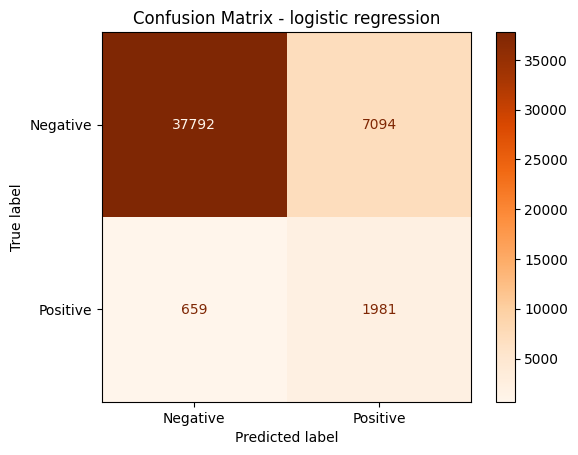

In [211]:
# look at confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Negative", "Positive"])
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - logistic regression")
plt.show()

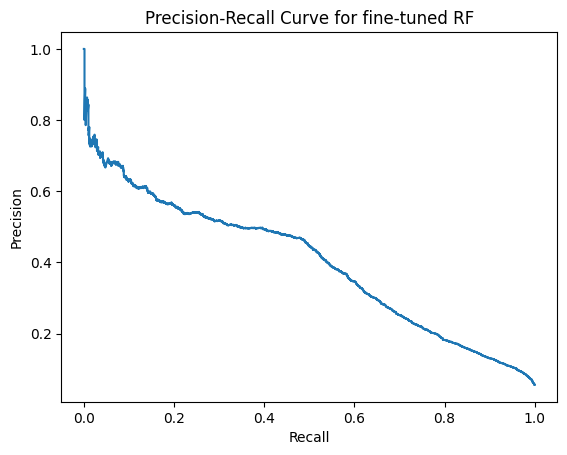

In [212]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for fine-tuned RF')
plt.show()


## Gradient boosting models (XGBoost, LightGBM, CatBoost)

XGBoost training is quite a lot faster than Random Forest

In [213]:
# Try XGBoost, lightGBM, CatBoost
# define model names for loop
models = {'xgboost':XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42),
          'lgbm':LGBMClassifier(class_weight = 'balanced', verbose = -1, random_state = 42),
          'catboost': CatBoostClassifier(class_weights =[1,scale_pos_weight], verbose = 0, random_state = 42),
          'hgb': HistGradientBoostingClassifier(class_weight = 'balanced', random_state = 42)} 

results = {}

# train models
for model_name, model in models.items():
    # fit the models
    model.fit(X_train, y_train)

    # make predictions on training and test data, to check overfitting
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # gather eval metrics
    train_F1 = f1_score(y_train, y_train_pred)
    test_F1 = f1_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_PRAuc = average_precision_score(y_train, y_train_pred_proba)
    test_PRAuc = average_precision_score(y_test, y_pred_proba)


    #put these eval results into results dictionary
    results[model_name] = {'train_F1':train_F1,
                           'test_F1':test_F1,
                           'train_recall':train_recall,
                           'test_recall':test_recall,
                           'train_precision':train_precision,
                           'test_precision':test_precision,
                           'train_accuracy':train_accuracy,
                           'test_accuracy':test_accuracy,
                           'train_PR_Auc':train_PRAuc,
                           'test_PR_Auc':test_PRAuc}
    
    #convert dict into df to enable visualisation and comparison of the results
    eval_results = pd.DataFrame(results).T




In [214]:
#view results table
eval_results

,train_F1,test_F1,train_recall,test_recall,train_precision,test_precision,train_accuracy,test_accuracy,train_PR_Auc,test_PR_Auc
xgboost,0.396981,0.333567,0.861471,0.719697,0.257916,0.217093,0.854606,0.840256,0.542598,0.372280
lgbm,0.340529,0.321544,0.825963,0.773106,0.214477,0.202984,0.822276,0.818773,0.448423,0.405577
catboost,0.414931,0.341361,0.872550,0.708712,0.272182,0.224826,0.863301,0.848083,0.536834,0.379931
hgb,0.333056,0.319620,0.815548,0.778409,0.209257,0.201096,0.818547,0.815911,0.437810,0.409184


Performance very similar across the different gradient boosting models


Try to fine-tune lgbm

In [215]:
param_grid = {
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 500, 1000],
    'reg_lambda': [1, 3, 5],
    'num_leaves': [16, 32, 64, 128]
}

lgb_model = LGBMClassifier(scale_pos_weight=scale_pos_weight, objective='binary', random_state=42)

# Set up StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=lgb_model, 
                           param_grid=param_grid, 
                           scoring='average_precision', 
                           cv=skf, 
                           verbose=1)

grid_search.fit(X_train, y_train)

# Update the model with best parameters
best_params = grid_search.best_params_
lgb_model.set_params(**best_params)
lgb_model.fit(X_train, y_train)

# Evaluate the tuned model on the test set
y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)
y_train_pred_proba = lgb_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Calculate metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_pr_auc = average_precision_score(y_train, y_train_pred_proba)
test_pr_auc = average_precision_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Best Parameters: {best_params}")
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train PR AUC: {train_pr_auc:.2f}, Test PR AUC: {test_pr_auc:.2f}")


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'num_leaves': 16, 'reg_lambda': 3}
Train F1 Score: 0.33, Test F1 Score: 0.33
Train Recall: 0.79, Test Recall: 0.78
Train Precision: 0.21, Test Precision: 0.21
Train PR AUC: 0.43, Test PR AUC: 0.41


In [216]:
lgb_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 16,
 'objective': 'binary',
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 3,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'scale_pos_weight': 17.00056812801818}

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'num_leaves': 16, 'reg_lambda': 3}

In [217]:
# Initialise fine-tuned LightGBM model
lgb_best_model = LGBMClassifier(
    num_leaves=16,
    max_depth=4,
    learning_rate=0.05,
    reg_lambda=3,
    n_estimators=100,
    random_state=42
)

# Train the model
lgb_best_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lgb_best_model.predict(X_train)
y_test_pred = lgb_best_model.predict(X_test)
y_train_pred_proba = lgb_best_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = lgb_best_model.predict_proba(X_test)[:, 1]

# Get evaluation metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_pr_auc = average_precision_score(y_train, y_train_pred_proba)
test_pr_auc = average_precision_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train PR AUC: {train_pr_auc:.2f}, Test PR AUC: {test_pr_auc:.2f}")



Train F1 Score: 0.34, Test F1 Score: 0.31
Train Recall: 0.24, Test Recall: 0.21
Train Precision: 0.61, Test Precision: 0.58
Train PR AUC: 0.43, Test PR AUC: 0.41


In [218]:
# Alter threshold value to optimise better for Recall
threshold = 0.055  # Example: Adjust the threshold here

# Apply the custom threshold to convert probabilities to binary predictions
y_train_pred = (y_train_pred_proba >= threshold).astype(int)
y_test_pred = (y_test_pred_proba >= threshold).astype(int)

# Get evaluation metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_pr_auc = average_precision_score(y_train, y_train_pred_proba)
test_pr_auc = average_precision_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Threshold: {threshold}")
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train PR AUC: {train_pr_auc:.2f}, Test PR AUC: {test_pr_auc:.2f}")

Threshold: 0.055
Train F1 Score: 0.32, Test F1 Score: 0.32
Train Recall: 0.79, Test Recall: 0.78
Train Precision: 0.20, Test Precision: 0.20
Train PR AUC: 0.43, Test PR AUC: 0.41


### Hist Gradient booster finetune

In [219]:
# Define the parameter grid
param_grid = {
    'max_iter': [50, 100, 200, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10]
}

hgb_clf = HistGradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=hgb_clf,
    param_grid=param_grid,
    scoring='average_precision',  # Optimize for PR AUC
    n_jobs=-1,          # Use all processors
    cv=5                # 5-fold cross-validation
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print(f"Best params are: {grid_search.best_params_}")
print(f"Best PR AUC score: {grid_search.best_score_}")

# Refit the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the tuned model on the training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_pr_auc = average_precision_score(y_train, y_train_pred_proba)
test_pr_auc = average_precision_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train PR AUC: {train_pr_auc:.2f}, Test PR AUC: {test_pr_auc:.2f}")



Best params are: {'learning_rate': 0.05, 'max_depth': 3, 'max_iter': 200}
Best PR AUC score: 0.4191249154779456
Train F1 Score: 0.35, Test F1 Score: 0.33
Train Recall: 0.25, Test Recall: 0.23
Train Precision: 0.60, Test Precision: 0.57
Train PR AUC: 0.43, Test PR AUC: 0.41


In [220]:
# Initialise best Histogram Gradient Boosting model
histgb_best_model = HistGradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=3,
    max_iter=200,
    random_state=42
)

# Train the model
histgb_best_model.fit(X_train, y_train)

# Make predictions
y_pred_train = histgb_best_model.predict(X_train)
y_pred_test = histgb_best_model.predict(X_test)
y_pred_proba_train = histgb_best_model.predict_proba(X_train)[:,1]  # get the predicted prob for positive class only
y_pred_proba_test = histgb_best_model.predict_proba(X_test)[:,1]

# Evaluate predictions
train_F1 = f1_score(y_train, y_pred_train)
test_F1 = f1_score(y_test, y_pred_test)
train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)
pr_auc_train = average_precision_score(y_train, y_pred_proba_train)
pr_auc_test = average_precision_score(y_test, y_pred_proba_test)
precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

# Print Metrics
print(f"Train F1 Score: {train_F1:.2f}, Test F1 Score: {test_F1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {precision_train:.2f}, Test Precision: {precision_test:.2f}")
print(f"Train PR AUC: {pr_auc_train:.2f}, Test PR AUC: {pr_auc_test:.2f}")

Train F1 Score: 0.35, Test F1 Score: 0.33
Train Recall: 0.25, Test Recall: 0.23
Train Precision: 0.60, Test Precision: 0.57
Train PR AUC: 0.43, Test PR AUC: 0.41


In [221]:
# Alter threshold value to optimise better for Recall
threshold = 0.05  # Example: Adjust the threshold here

# Apply the custom threshold to convert probabilities to binary predictions
y_train_pred = (y_train_pred_proba >= threshold).astype(int)
y_test_pred = (y_test_pred_proba >= threshold).astype(int)

# Get evaluation metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_pr_auc = average_precision_score(y_train, y_train_pred_proba)
test_pr_auc = average_precision_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Threshold: {threshold}")
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train PR AUC: {train_pr_auc:.2f}, Test PR AUC: {test_pr_auc:.2f}")

Threshold: 0.05
Train F1 Score: 0.31, Test F1 Score: 0.31
Train Recall: 0.81, Test Recall: 0.80
Train Precision: 0.19, Test Precision: 0.19
Train PR AUC: 0.43, Test PR AUC: 0.41


## XGBoost fine-tuning

In [222]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'scale_pos_weight': [scale_pos_weight, 10] # try a slightly lower scaling too
}

xgb_clf = XGBClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='average_precision',  # Optimize for PR AUC
    n_jobs=-1,          # Use all processors
    cv=5                # 5-fold cross-validation
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print(f"Best params are: {grid_search.best_params_}")
print(f"Best PR AUC score: {grid_search.best_score_}")

# Refit the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the tuned model on the training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_pr_auc = average_precision_score(y_train, y_train_pred_proba)
test_pr_auc = average_precision_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train PR AUC: {train_pr_auc:.2f}, Test PR AUC: {test_pr_auc:.2f}")

Best params are: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 10}
Best PR AUC score: 0.4184394054466248
Train F1 Score: 0.42, Test F1 Score: 0.41
Train Recall: 0.68, Test Recall: 0.65
Train Precision: 0.30, Test Precision: 0.30
Train PR AUC: 0.44, Test PR AUC: 0.41


In [223]:
# Initialise best XGBoost model
xgb_clf_best_model = XGBClassifier(learning_rate = 0.05, 
                                   max_depth = 5, 
                                   n_estimators = 100, 
                                   scale_pos_weight = 10,
                                   random_state = 42)

# Train the model
xgb_clf_best_model.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_clf_best_model.predict(X_train)
y_pred_test = xgb_clf_best_model.predict(X_test)
y_pred_proba_train = xgb_clf_best_model.predict_proba(X_train)[:,1] # get the predicted prob for positive class only
y_pred_proba_test = xgb_clf_best_model.predict_proba(X_test)[:,1]

#Evaluate predictions
train_F1 = f1_score(y_train, y_pred_train)
test_F1 = f1_score(y_test, y_pred_test)
train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)
pr_auc_train = average_precision_score(y_train, y_pred_proba_train)
pr_auc_test = average_precision_score(y_test, y_pred_proba_test)
precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train PR AUC: {train_pr_auc:.2f}, Test PR AUC: {test_pr_auc:.2f}")


Train F1 Score: 0.42, Test F1 Score: 0.41
Train Recall: 0.68, Test Recall: 0.65
Train Precision: 0.30, Test Precision: 0.30
Train PR AUC: 0.44, Test PR AUC: 0.41


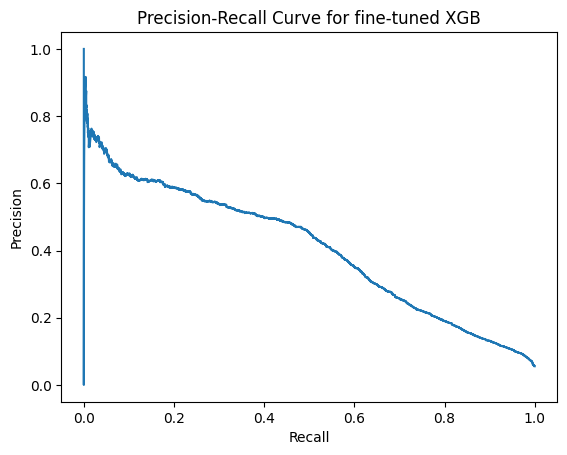

In [224]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for fine-tuned XGB')
plt.show()

In [225]:
# Make predictions with altered threshold, to get satisfactory recall
threshold = 0.37  # Manually set the threshold for classification
y_pred_train = (xgb_clf_best_model.predict_proba(X_train)[:, 1] >= threshold).astype(int)
y_pred_test = (xgb_clf_best_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
y_pred_proba_train = xgb_clf_best_model.predict_proba(X_train)[:, 1]
y_pred_proba_test = xgb_clf_best_model.predict_proba(X_test)[:, 1]

# Evaluate predictions
train_F1 = f1_score(y_train, y_pred_train)
test_F1 = f1_score(y_test, y_pred_test)
train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)
pr_auc_train = average_precision_score(y_train, y_pred_proba_train)
pr_auc_test = average_precision_score(y_test, y_pred_proba_test)
precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

# Print Metrics
print(f"Train F1 Score: {train_F1:.2f}, Test F1 Score: {test_F1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {precision_train:.2f}, Test Precision: {precision_test:.2f}")
print(f"Train PR AUC: {pr_auc_train:.2f}, Test PR AUC: {pr_auc_test:.2f}")

Train F1 Score: 0.33, Test F1 Score: 0.32
Train Recall: 0.80, Test Recall: 0.78
Train Precision: 0.21, Test Precision: 0.20
Train PR AUC: 0.44, Test PR AUC: 0.41


# Neural network

In [226]:
# Due to imbalanced dataset, generate class weights (need to reset index first or throws error)
# Reset index 
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#generate class weights dictionary
class_weights_dict = {0: 1.0, 1: scale_pos_weight}
class_weights_dict

{0: 1.0, 1: 17.00056812801818}

c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9492 - pr_auc: 0.3042 - val_loss: 0.4215 - val_pr_auc: 0.3957
Epoch 2/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8120 - pr_auc: 0.3797 - val_loss: 0.4122 - val_pr_auc: 0.3983
Epoch 3/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8100 - pr_auc: 0.3858 - val_loss: 0.3975 - val_pr_auc: 0.3991
Epoch 4/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8020 - pr_auc: 0.3961 - val_loss: 0.4090 - val_pr_auc: 0.4016
Epoch 5/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8020 - pr_auc: 0.3898 - val_loss: 0.4087 - val_pr_auc: 0.4019
Epoch 6/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8038 - pr_auc: 0.3979 - val_loss: 0.4121 - val_pr_auc: 0.4028
Epoch 7/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7989 - pr_auc: 0.3932 - val_loss: 0.3841 - val_pr_auc: 0.4047
Epoch 8/50
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7927 - pr_auc: 0.3984 - val_loss: 0.4036 - val_pr_auc: 0.4033
Epoch 9/

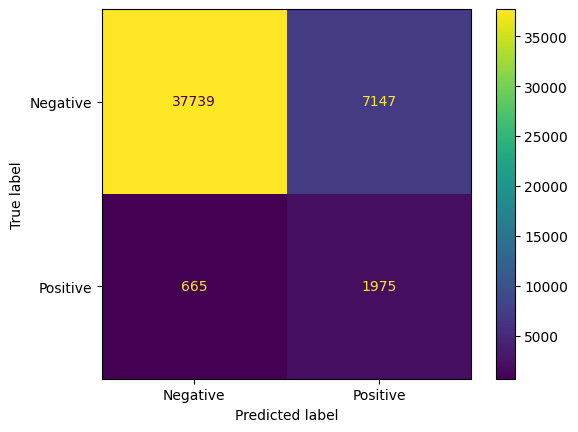

In [227]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import AUC

# Initialize the model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Input and first hidden layer
    Dropout(0.3),  # For dealing with overfitting
    Dense(32, activation='relu'),  
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=[AUC(name="pr_auc", curve="PR")])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_test_scaled, y_test), 
                    epochs=50, 
                    batch_size=256, 
                    callbacks=[early_stopping],
                    class_weight=class_weights_dict)

# Evaluate the model and generate metrics
# Predict probabilities and convert to binary predictions
y_train_prob = model.predict(X_train_scaled).ravel()  # Flatten probabilities
y_test_prob = model.predict(X_test_scaled).ravel()

threshold = 0.5
y_train_pred = (y_train_prob > threshold).astype(int)
y_test_pred = (y_test_prob > threshold).astype(int)

# Training Metrics
f1_train = f1_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
pr_auc_train = average_precision_score(y_train, y_train_prob)

# Testing Metrics
f1_test = f1_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
pr_auc_test = average_precision_score(y_test, y_test_prob)

# Print Metrics
print(f"F1 Score Train: {f1_train:.2f}")
print(f"F1 Score Test: {f1_test:.2f}")
print(f"Recall Train: {recall_train:.2f}")
print(f"Recall Test: {recall_test:.2f}")
print(f"Precision Train: {precision_train:.2f}")
print(f"Precision Test: {precision_test:.2f}")
print(f"PR AUC Train: {pr_auc_train:.2f}")
print(f"PR AUC Test: {pr_auc_test:.2f}")

# Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Negative", "Positive"]).plot()
plt.show()


## Compare finetuned model performance

In [228]:
models_metrics = [
    {
        "Model": "Random Forest",
        "train_F1": 0.36,
        "test_F1": 0.34,
        "train_recall": 0.79,
        "test_recall": 0.75,
        "train_precision": 0.23,
        "test_precision": 0.22,
        "train_PRAuc": 0.47,
        "test_PRAuc": 0.40
    },
    {"Model": "Light GBM (thresh=0.055)",
        "train_F1": 0.32,
        "test_F1": 0.32,
        "train_recall": 0.79,
        "test_recall": 0.78,
        "train_precision": 0.20,
        "test_precision": 0.20,
        "train_PRAuc": 0.43,
        "test_PRAuc": 0.41
    },
    {
        "Model": "HGBoost (thresh = 0.05)",
        "train_F1": 0.31,
        "test_F1": 0.30,
        "train_recall": 0.82,
        "test_recall": 0.80,
        "train_precision": 0.19,
        "test_precision": 0.19,
        "train_PRAuc": 0.43,
        "test_PRAuc": 0.41
    },
    {
        "Model": "XGBoost (thresh=0.37)",
        "train_F1": 0.33,
        "test_F1": 0.32,
        "train_recall": 0.80,
        "test_recall": 0.78,
        "train_precision": 0.21,
        "test_precision": 0.20,
        "train_PRAuc": 0.44,
        "test_PRAuc": 0.41
    },
    {
        "Model": "Neural Network",
        "train_F1": 0.33,
        "test_F1": 0.32,
        "train_recall": 0.79,
        "test_recall": 0.78,
        "train_precision": 0.21,
        "test_precision": 0.20,
        "train_PRAuc": 0.42,
        "test_PRAuc": 0.40
    },
    {
        "Model": "SVM",
        "train_F1": 0.46,
        "test_F1": 0.35,
        "train_recall": 0.86,
        "test_recall": 0.65,
        "train_precision": 0.32,
        "test_precision": 0.24,
        "train_PRAuc": 0.47,
        "test_PRAuc": 0.27
    },
    {
        "Model": "Logistic Regression",
        "train_F1": 0.34,
        "test_F1": 0.34,
        "train_recall": 0.77,
        "test_recall": 0.76,
        "train_precision": 0.22,
        "test_precision": 0.22,
        "train_PRAuc": 0.41,
        "test_PRAuc": 0.40
    }
]

# Convert the list of dictionaries into a DataFrame
models_metrics_df = pd.DataFrame(models_metrics)

# Set 'Model' column as the index
models_metrics_df.set_index("Model", inplace=True)

In [229]:
models_metrics_df

,train_F1,test_F1,train_recall,test_recall,train_precision,test_precision,train_PRAuc,test_PRAuc
Model,,,,,,,,
Random Forest,0.36,0.34,0.79,0.75,0.23,0.22,0.47,0.40
Light GBM (thresh=0.055),0.32,0.32,0.79,0.78,0.20,0.20,0.43,0.41
HGBoost (thresh = 0.05),0.31,0.30,0.82,0.80,0.19,0.19,0.43,0.41
XGBoost (thresh=0.37),0.33,0.32,0.80,0.78,0.21,0.20,0.44,0.41
Neural Network,0.33,0.32,0.79,0.78,0.21,0.20,0.42,0.40
SVM,0.46,0.35,0.86,0.65,0.32,0.24,0.47,0.27
Logistic Regression,0.34,0.34,0.77,0.76,0.22,0.22,0.41,0.40


SVM slightly poorer due to overfitting, too long to fine-tune. 

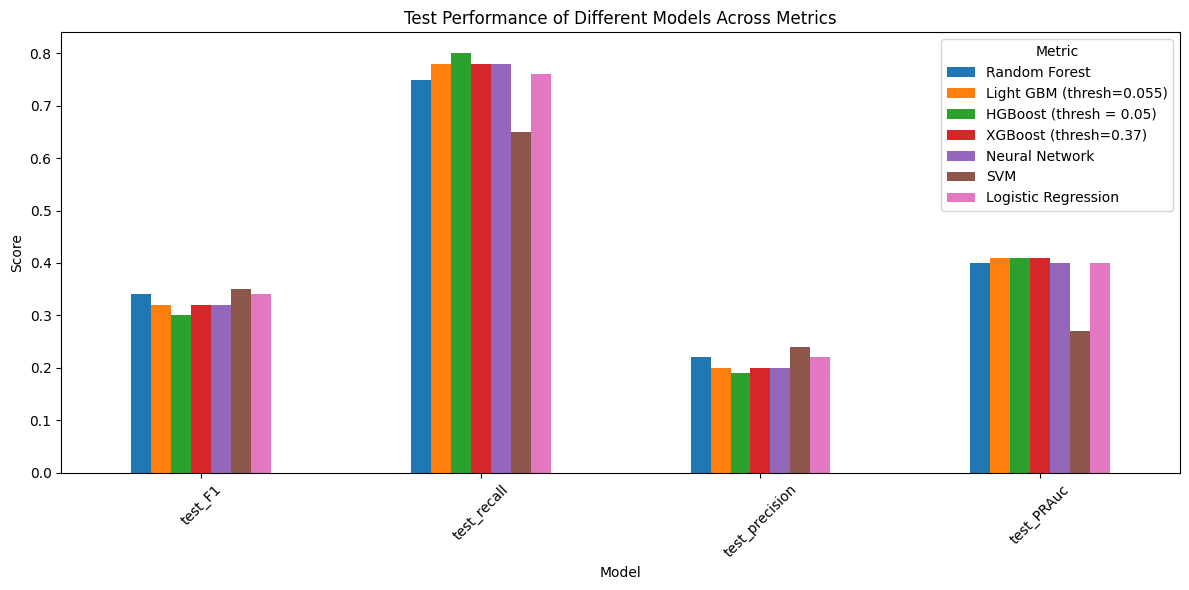

In [230]:
models_metrics_test = models_metrics_df[['test_F1','test_recall','test_precision','test_PRAuc']]
models_metrics_test.T.plot(kind="bar", figsize=(12, 6))
plt.title("Test Performance of Different Models Across Metrics")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

Performance across the different models very similar! Gradient boosting models need sometimes v. low thresholds for acceptable Recall scores, this will hinder interpretability of the probability scores, I want my deployed model to give easily interpretable probabilities for risk of heart disease (where a score >0.5 presents a high risk). Focus therefore on RF, ANN, and log regression

# Take forward favourite model and reduce the number of features for deployment

Fine-tuned Random Forest taken forward for feature reduction

Text(0.5, 1.0, 'Top 10 features for Random Forest classifier')

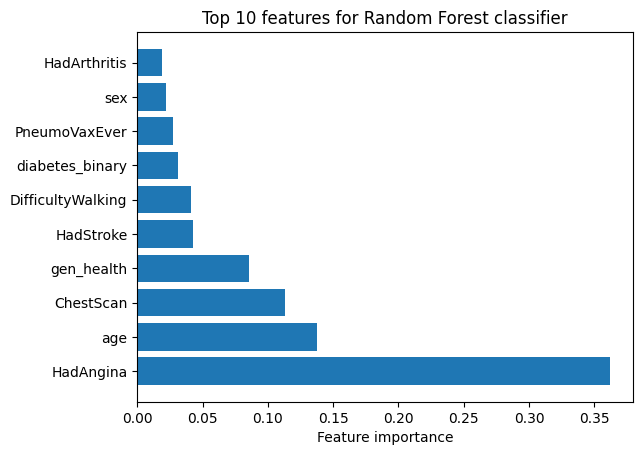

In [231]:
# Random Forest feature importance
feature_importances = rf_clf_best_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
top_ten = feature_importance_df.sort_values(by = 'Importance', ascending = False).head(10)

# Plot barchart of top 10 features
plt.barh(top_ten['Feature'], top_ten['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 10 features for Random Forest classifier')

# Take top 7 features, retrain my RF on reduced dataset

In [232]:
top_seven = feature_importance_df.sort_values(by = 'Importance', ascending = False).head(7)
X_reduced = X[top_seven['Feature'].values]

In [233]:
X_reduced.shape

(237630, 7)

In [234]:
X_reduced.head()

,HadAngina,age,ChestScan,gen_health,HadStroke,DifficultyWalking,diabetes_binary
0,1,11,1,3,0,1,1
1,0,9,0,1,0,0,0
2,0,8,0,0,0,0,0
3,0,10,0,1,0,0,1
4,0,6,1,2,0,0,0


In [235]:
# Split my reduced feature dataset
X_train_red, X_test_red, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, stratify = y, random_state = 42)

Re-optimise random forest for redcued dataset

In [236]:
# Try GridSearchCV to find best RF parameters
# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 50],
    'min_samples_split': [2, 10, 50],
    'min_samples_leaf': [2, 10, 50]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring=pr_auc_scorer,  # Optimize for ROC AUC
    cv=5,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train_red, y_train)

# Display the best parameters and the best score
print(f"Best params are: {grid_search.best_params_}")
print(f"Best PR AUC score: {grid_search.best_score_}")

# Refit the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the tuned model on the training and test sets
y_train_pred = best_model.predict(X_train_red)
y_test_pred = best_model.predict(X_test_red)
y_train_pred_proba = best_model.predict_proba(X_train_red)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test_red)[:, 1]

# Calculate metrics
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_pr_auc = average_precision_score(y_train, y_train_pred_proba)
test_pr_auc = average_precision_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train PR AUC: {train_pr_auc:.2f}, Test PR AUC: {test_pr_auc:.2f}")




c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
179 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python31

Best params are: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 1000}
Best PR AUC score: 0.39386827934786905
Train F1 Score: 0.30, Test F1 Score: 0.30
Train Recall: 0.78, Test Recall: 0.76
Train Precision: 0.19, Test Precision: 0.19
Train PR AUC: 0.40, Test PR AUC: 0.38


Best params are: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 2, 'n_estimators': 500}

In [237]:
# initialise the finetuned RF classifier
rf_clf_best_model = RandomForestClassifier(class_weight = 'balanced',
                                n_estimators = 500, 
                                max_features = 'sqrt',
                                min_samples_split= 2,
                                min_samples_leaf= 50,
                                max_depth= 10,
                                random_state = 42)

# train the model
rf_clf_best_model.fit(X_train_red, y_train)

# make predicitons
y_pred_train = rf_clf_best_model.predict(X_train_red)
y_pred_test = rf_clf_best_model.predict(X_test_red)
y_pred_proba_train = rf_clf_best_model.predict_proba(X_train_red)[:,1] 
y_pred_proba_test = rf_clf_best_model.predict_proba(X_test_red)[:,1] # get the predicted probabilities for the positive class only (col 1)

# f1_score
F1_train = f1_score(y_train, y_pred_train)
F1_test = f1_score(y_test, y_pred_test)
print(f"F1 score train: {F1_train:.2f}")
print(f"F1 score test: {F1_test:.2f}")
# Recall
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
print(f"Recall train: {recall_train:.2f}")
print(f"Recall test: {recall_test:.2f}")
Precision_train = precision_score(y_train, y_pred_train)
Precision_test = precision_score(y_test, y_pred_test)
print(f"Precision train: {Precision_train:.2f}")
print(f"Precision test: {Precision_test:.2f}")


# ROC AUC
pr_auc_train = average_precision_score(y_train, y_pred_proba_train)
pr_auc_test = average_precision_score(y_test, y_pred_proba_test)
print(f"PR AUC train: {pr_auc_train:.2f}")
print(f"PR AUC test: {pr_auc_test:.2f}")

F1 score train: 0.31
F1 score test: 0.31
Recall train: 0.79
Recall test: 0.77
Precision train: 0.20
Precision test: 0.19
PR AUC train: 0.40
PR AUC test: 0.38


In [238]:
from imblearn.over_sampling import SMOTE
# initialize SMOTE
smote = SMOTE(random_state = 42)

# apply resampling to training data
X_resampled, y_resampled = smote.fit_resample(X_train_red, y_train)

In [239]:
# initialise the finetuned RF classifier
rf_clf_smote = RandomForestClassifier(class_weight = 'balanced',
                                n_estimators = 500, 
                                max_features = 'sqrt',
                                min_samples_split= 2,
                                min_samples_leaf= 50,
                                max_depth= 10,
                                random_state = 42)


# train the model
rf_clf_smote.fit(X_resampled, y_resampled)

# Make predictions
y_pred_train = rf_clf_smote.predict(X_resampled)
y_pred_test = rf_clf_smote.predict(X_test_red)
y_pred_proba_train = rf_clf_smote.predict_proba(X_resampled)[:,1] # get the predicted prob for positive class only
y_pred_proba_test = rf_clf_smote.predict_proba(X_test_red)[:,1]

# Evaluate on resampled training data
train_f1 = f1_score(y_resampled, y_pred_train)
train_recall = recall_score(y_resampled, y_pred_train)
train_precision = precision_score(y_resampled, y_pred_train)
train_roc_auc = roc_auc_score(y_resampled, y_pred_proba_train)

# Evaluate on original test data
test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test)

# Print the metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train ROC AUC: {train_roc_auc:.2f}, Test ROC AUC: {test_roc_auc:.2f}")

Train F1 Score: 0.79, Test F1 Score: 0.30
Train Recall: 0.79, Test Recall: 0.77
Train Precision: 0.80, Test Precision: 0.19
Train ROC AUC: 0.88, Test ROC AUC: 0.88


In [240]:
# Much overfitting on resampled data, try finetuning again
# Try GridSearchCV to find best RF parameters
# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 50],
    'min_samples_split': [2, 10, 50],
    'min_samples_leaf': [2, 10, 50]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring=pr_auc_scorer,  # Optimize for PR AUC
    cv=5,
    n_jobs=-1,  # Use all processors
    verbose=1
)

# Fit the grid search on resampled data (only for tuning)
grid_search.fit(X_resampled, y_resampled)

# Display the best parameters and the best score
print(f"Best params are: {grid_search.best_params_}")
print(f"Best PR AUC score from cross-validation: {grid_search.best_score_:.2f}")

# Refit the model with the best parameters on the original training data
best_model = grid_search.best_estimator_
best_model.fit(X_train_red, y_train)

# Make predictions on both train and test sets
y_train_pred = best_model.predict(X_train_red)
y_test_pred = best_model.predict(X_test_red)
y_train_pred_proba = best_model.predict_proba(X_train_red)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test_red)[:, 1]

# Calculate metrics for original training and test data
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_pr_auc = average_precision_score(y_train, y_train_pred_proba)
test_pr_auc = average_precision_score(y_test, y_test_pred_proba)

# Print Metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train PR AUC: {train_roc_auc:.2f}, Test PR AUC: {test_roc_auc:.2f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
148 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python31

Best params are: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}
Best PR AUC score from cross-validation: 0.88
Train F1 Score: 0.32, Test F1 Score: 0.32
Train Recall: 0.78, Test Recall: 0.76
Train Precision: 0.20, Test Precision: 0.20
Train PR AUC: 0.88, Test PR AUC: 0.88


'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000

In [241]:
# initialise the SMOTE finetuned RF classifier
rf_clf_smote = RandomForestClassifier(class_weight = 'balanced',
                                n_estimators = 1000, 
                                max_features = 'sqrt',
                                min_samples_split= 2,
                                min_samples_leaf= 2,
                                max_depth= 50,
                                random_state = 42)


# train the model on the resampled data
rf_clf_smote.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred_train = rf_clf_smote.predict(X_resampled)
y_pred_test = rf_clf_smote.predict(X_test_red)
y_pred_proba_train = rf_clf_smote.predict_proba(X_resampled)[:,1] # get the predicted prob for positive class only
y_pred_proba_test = rf_clf_smote.predict_proba(X_test_red)[:,1]

# Evaluate on resampled training data
train_f1 = f1_score(y_resampled, y_pred_train)
train_recall = recall_score(y_resampled, y_pred_train)
train_precision = precision_score(y_resampled, y_pred_train)
train_pr_auc = average_precision_score(y_resampled, y_pred_proba_train)

# Evaluate on original test data
test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_pr_auc = average_precision_score(y_test, y_pred_proba_test)

# Print the metrics
print(f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")
print(f"Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}")
print(f"Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}")
print(f"Train PR AUC: {train_pr_auc:.2f}, Test PR AUC: {test_pr_auc:.2f}")


Train F1 Score: 0.80, Test F1 Score: 0.31
Train Recall: 0.78, Test Recall: 0.75
Train Precision: 0.81, Test Precision: 0.19
Train PR AUC: 0.89, Test PR AUC: 0.35


In [242]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[36627  8259]
 [  670  1970]]


Performance of RF using SMOTE resampled data appears worse!


In [243]:
import os

# Define the path to the new folder on the Desktop
folder_path = r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\Heart_disease_streamlit"


# Create the directory if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Define the full path for the model file
model_path = os.path.join(folder_path, "bestRF_model.pkl")

# Save the model using pickle
with open(model_path, "wb") as file:
    pickle.dump(rf_clf_best_model, file)

print(f"Model saved successfully to: {model_path}")


Model saved successfully to: C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\Heart_disease_streamlit\bestRF_model.pkl


## Extract feature list for params to enter

In [244]:
feature_list = X_reduced.columns.tolist()
feature_list

['HadAngina',
 'age',
 'ChestScan',
 'gen_health',
 'HadStroke',
 'DifficultyWalking',
 'diabetes_binary']

In [245]:
# look at allowed values for user input into deployed model
for col in X_reduced.columns:
    unique_values = sorted(X_reduced[col].unique())
    print(f'{col}: {unique_values}')


HadAngina: [0, 1]
age: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ChestScan: [0, 1]
gen_health: [0, 1, 2, 3, 4]
HadStroke: [0, 1]
DifficultyWalking: [0, 1]
diabetes_binary: [0, 1]
